# 데이터 전처리와 시각화 _ 20260205  

## **Day 1 Project : 택시 이용내역 데이터**  

이전 학습에서 배웠던 다양한 Data cleaning 기술을 활용하여 cleaning된 나만의 데이터를 만들고 정리하여 제출합니다.    
  
**프로젝트 수행 방법**  
사용데이터 이름 : trip.csv  
다양한 변수를 활용하여 '택시요금'을 예측한다는 가정하에 데이터를 정제합니다.  

**프로젝트 수행 내역**  
**Step 1.** 필수  
1. 결측치 판단 및 처리 : 결측치의 유무와 비율을 살펴보고 적절한 방법으로 처리한다.  
2. 이상치 판단 및 처리 : 숫자형 변수 각각에 대하여, 데이터의 index와 변수값 사이의 scatter plot을 그려보고 이상치가 관찰될 경우 제거한다.  

**Step 2.** 추가  
1. 택시 탑승 및 하차시간을 활용할 방법을 고민해본다. 
2. Credit Card와 Drbit Card 구분없이 'Card'라는 이름으로 정리한다.   


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df_trip = pd.read_csv('trip.csv')
df_trip

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [11]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [12]:
df_trip.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,22701.0,1.643584,1.304942,0.0,1.00,1.00,2.00,36.00
trip_distance,22701.0,2.913400,3.653023,0.0,0.99,1.61,3.06,33.96
fare_amount,22698.0,13.024009,13.240074,-120.0,6.50,9.50,14.50,999.99
tip_amount,22701.0,1.835745,2.800537,0.0,0.00,1.35,2.45,200.00
tolls_amount,22701.0,0.312514,1.399153,0.0,0.00,0.00,0.00,19.10


In [26]:
# 숫자형 변수 묶음 _ 분석 편의를 위한 설정
num_cols = [
    'passenger_count',
    'trip_distance',
    'fare_amount',
    'tip_amount',
    'tolls_amount'
]

In [17]:
df_trip.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22696    False
22697    False
22698    False
22699    False
22700    False
Length: 22701, dtype: bool

In [19]:
df_trip.duplicated().sum() # 2회 이상 이용고객 포함

np.int64(2)

In [20]:
df_trip.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

### **프로젝트에 앞서** : 데이터 구조 파악  

- 데이터로드 및 크기 확인 : info(), describe() 함수 이용 
   - shape : index 22701 x columns 9  
   - dtypes: float64(4), int64(1), object(4)
- 샘플 확인 완료  
- 중복자료 여부 확인 : duplicated() 명령어 이용 -> 없음  
- 결측치 확인 : fare_amount 항목에 3개의 결측치 확인  

※ 데이터 구조와 샘플을 확인해본 결과 택시 이용시간에 대한 자료가 'object'로 확인되었다. 추가적인 분석(일별 매출, 요일별 이용패턴, 출퇴근 시간대 분석 등)을 진행할 경우를 대비하여 datetime으로 정리를 진행하도록 하겠다. 

In [21]:
# 날짜,시간(tpep_pickup_datetime, tpep_dropoff_datetime)열 변환

df_trip['tpep_pickup_datetime'] = pd.to_datetime(df_trip['tpep_pickup_datetime'])
df_trip['tpep_dropoff_datetime'] = pd.to_datetime(df_trip['tpep_dropoff_datetime'])

# 날짜/요일/시간대 구분

# 날짜
df_trip['pickup_date'] = df_trip['tpep_pickup_datetime'].dt.date
df_trip['dropoff_date'] = df_trip['tpep_dropoff_datetime'].dt.date

# 요일 (0=Mon, 1=Tue, 2=Wed, 3=Thu, 4=Fri, 5=Sat, 6=Sun)
df_trip['pickup_weekday_num'] = df_trip['tpep_pickup_datetime'].dt.weekday
df_trip['dropoff_weekday_num'] = df_trip['tpep_dropoff_datetime'].dt.weekday

# 요일 이름 (Mon, Tue, Wed, Thu, Fri, Sat, Sun)
df_trip['pickup_weekday'] = df_trip['tpep_pickup_datetime'].dt.day_name().str[:3]
df_trip['dropoff_weekday'] = df_trip['tpep_dropoff_datetime'].dt.day_name().str[:3]

# 시간 (0:00 ~ 23:59)
df_trip['pickup_hour'] = df_trip['tpep_pickup_datetime'].dt.hour
df_trip['dropoff_hour'] = df_trip['tpep_dropoff_datetime'].dt.hour

In [22]:
df_trip.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,pickup_date,dropoff_date,pickup_weekday_num,dropoff_weekday_num,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.0,2017-03-25,2017-03-25,5,5,Sat,Sat,8,9
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.0,2017-04-11,2017-04-11,1,1,Tue,Tue,14,15
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.0,2017-12-15,2017-12-15,4,4,Fri,Fri,7,7
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,2017-05-07,2017-05-07,6,6,Sun,Sun,13,13
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.0,2017-04-15,2017-04-15,5,5,Sat,Sat,23,23


### **Step 1. 필수 프로젝트 수행**  

#### 1-1. 결측치 판단 및 처리 
: 결측치의 유무와 비율을 살펴보고 적절한 방법으로 처리한다.   

**[결측치 확인 및 처리 여부]**  
- fare_amount 열에 값이 누락된 건이 3건이 있으며, 이는 전체 데이터 22,701건 중 0.013%를 차지한다.  
- 결측치 처리에 있어 매출과 요금을 분석하는데 목적을 둔다면 해당 값을 제거하는 것이 합리적이다.  
- 원본데이터와 별도로 결측치를 제거한 분석용 데이터를 생성하겠다.

In [23]:
# 결측치 유무 및 비율 확인
df_trip.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
pickup_date              0.000000
dropoff_date             0.000000
pickup_weekday_num       0.000000
dropoff_weekday_num      0.000000
pickup_weekday           0.000000
dropoff_weekday          0.000000
pickup_hour              0.000000
dropoff_hour             0.000000
dtype: float64

In [24]:
# 결측치만 별도로 구분하여 데이터 확인
df_trip[df_trip['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [25]:
# 결측치를 포함한 데이터만 별도로 분리
non_fare_index = df_trip[df_trip['fare_amount'].isna()]
non_fare_index

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [27]:
df_trip[df_trip['fare_amount'] <= 0][num_cols].describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,20.000000,20.000000,20.000000,20.0,20.000000
mean,1.600000,1.558500,-8.175000,0.0,0.625000
std,1.391705,4.696322,26.373469,0.0,2.795085
min,1.000000,0.000000,-120.000000,0.0,0.000000
25%,1.000000,0.035000,-3.625000,0.0,0.000000
50%,1.000000,0.145000,-2.750000,0.0,0.000000
75%,1.250000,0.422500,0.000000,0.0,0.000000
max,6.000000,20.400000,0.000000,0.0,12.500000


#### 1-2. 이상치 판단(Outlier Detection) 및 처리 
: 숫자형 변수 각각에 대하여 데이터의 index와 변수값 사이의 scatter plot을 그려보고 이상치가 관찰될 경우, 이를 제거합니다.   

##### **1-2-1. 그래프 작성 및 분석**  
  
**작성 그래프** : 과제에서 제시된 scatter plot 뿐만 아니라, boxplot, 오차막대를 추가하였습니다.   
- **histplot** : 전체적인 데이터의 분포 파악  
- **boxplot** : IQR 기준 이상치를 한눈에 파악 가능 / 데이터 분포의 비대칭성도 확인 가능  
- **scatterplot** : 이상치가 랜덤한 오류인지, 또는 특정조건(시간/거리/승객수)에서 발생한 오류인지 추세확인 가능  

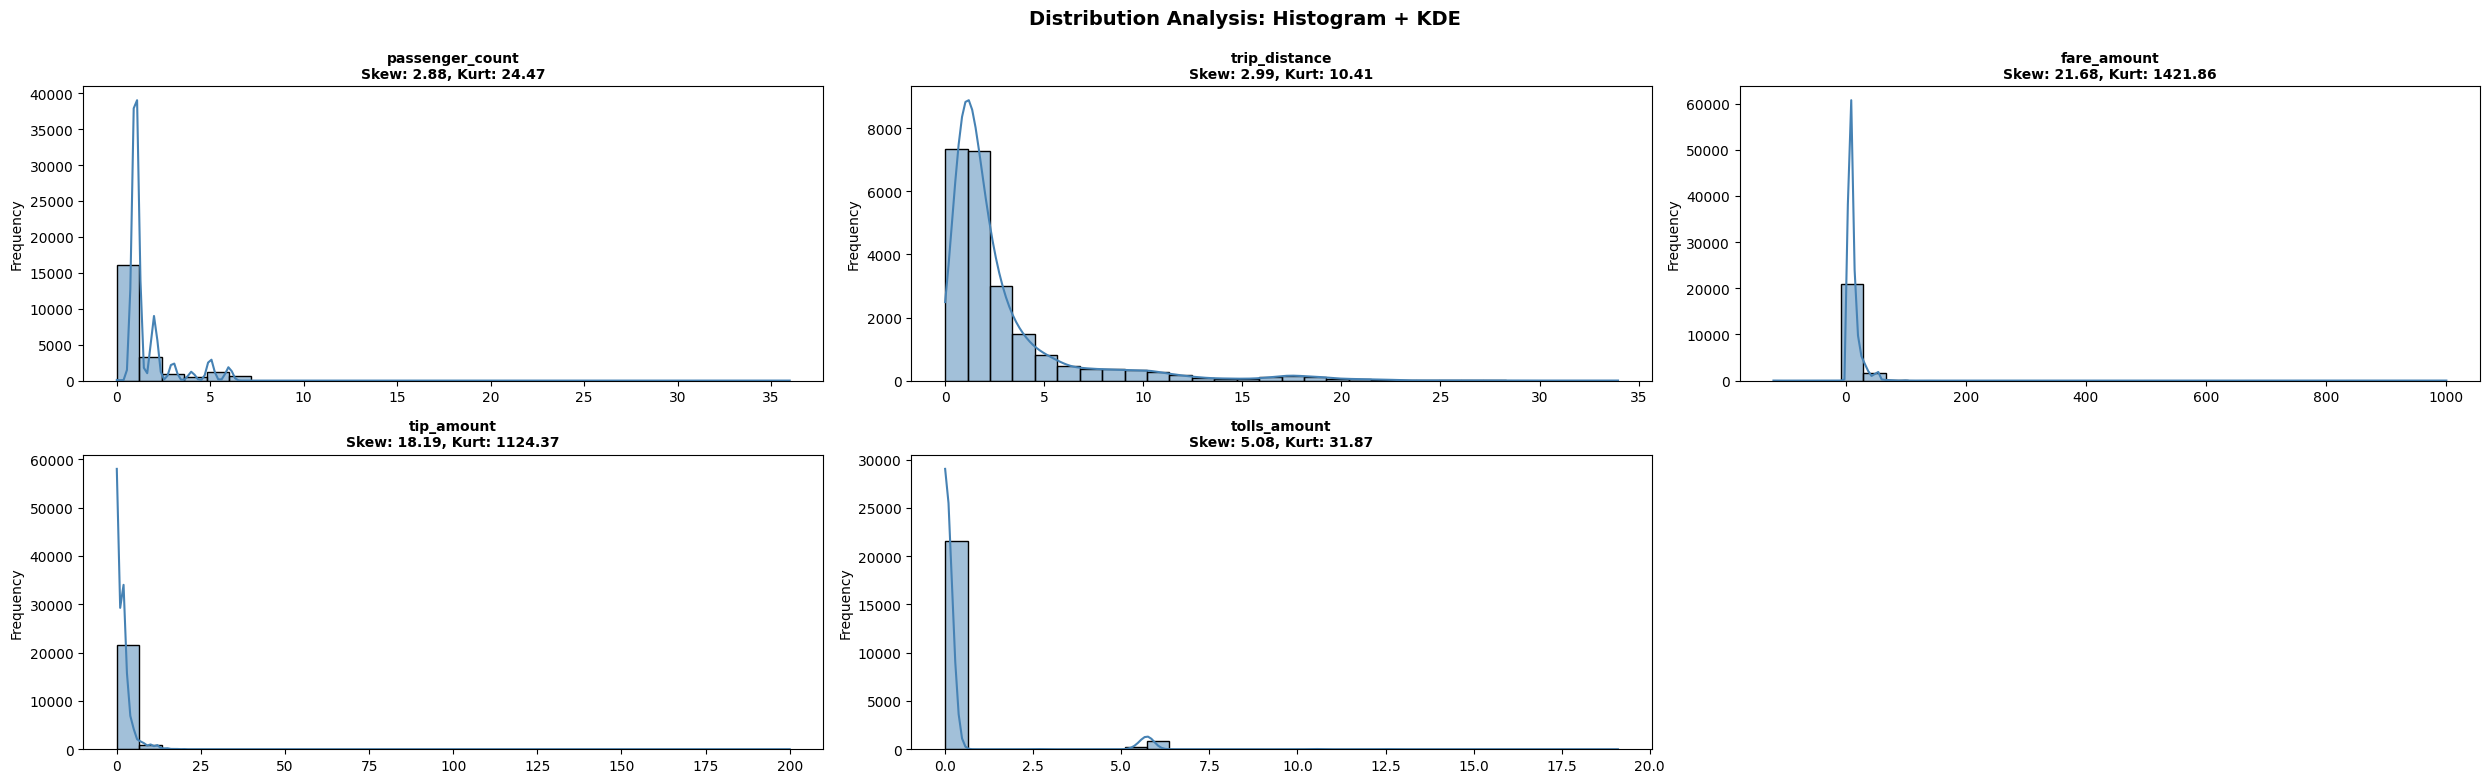


📊 Skewness & Kurtosis Summary (절댓값 큰 순서):


,Feature,Skewness,Kurtosis
2,fare_amount,21.681207,1421.863391
3,tip_amount,18.188461,1124.370617
4,tolls_amount,5.082976,31.868299
1,trip_distance,2.994944,10.411309
0,passenger_count,2.875247,24.471746



💡 [Insight]
- Skewness > 1: 수치형 변수 모두가 우측 꼬리가 긴 분포형태를 보입니다.
- 'amount' 항목의 경우, 로그변환을 고려할 수 있으나, 추후 이상치와 극단값을 제거한 후 다시 검토해보겠습니다.


In [37]:
# 숫자형 변수 histplot 그래프 표현

fig, axes = plt.subplots(4, 3, figsize=(25, 15))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.histplot(df_trip[col], kde=True, ax=ax, color='steelblue', bins=30)

    # Skewness 계산
    skew = df_trip[col].skew()
    kurt = df_trip[col].kurtosis()

    ax.set_title(f'{col}\nSkew: {skew:.2f}, Kurt: {kurt:.2f}', fontsize=10, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

# 빈 subplot 제거
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution Analysis: Histogram + KDE', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Skewness 요약 테이블
skew_summary = pd.DataFrame({
    'Feature': num_cols,
    'Skewness': [df_trip[col].skew() for col in num_cols],
    'Kurtosis': [df_trip[col].kurtosis() for col in num_cols]
}).sort_values('Skewness', key=abs, ascending=False)

print("\n📊 Skewness & Kurtosis Summary (절댓값 큰 순서):")
display(skew_summary)

print("\n💡 [Insight]")
print("- Skewness > 1: 수치형 변수 모두가 우측 꼬리가 긴 분포형태를 보입니다.")
print("- 'amount' 항목의 경우, 로그변환을 고려할 수 있으나, 추후 이상치와 극단값을 제거한 후 다시 검토해보겠습니다.")

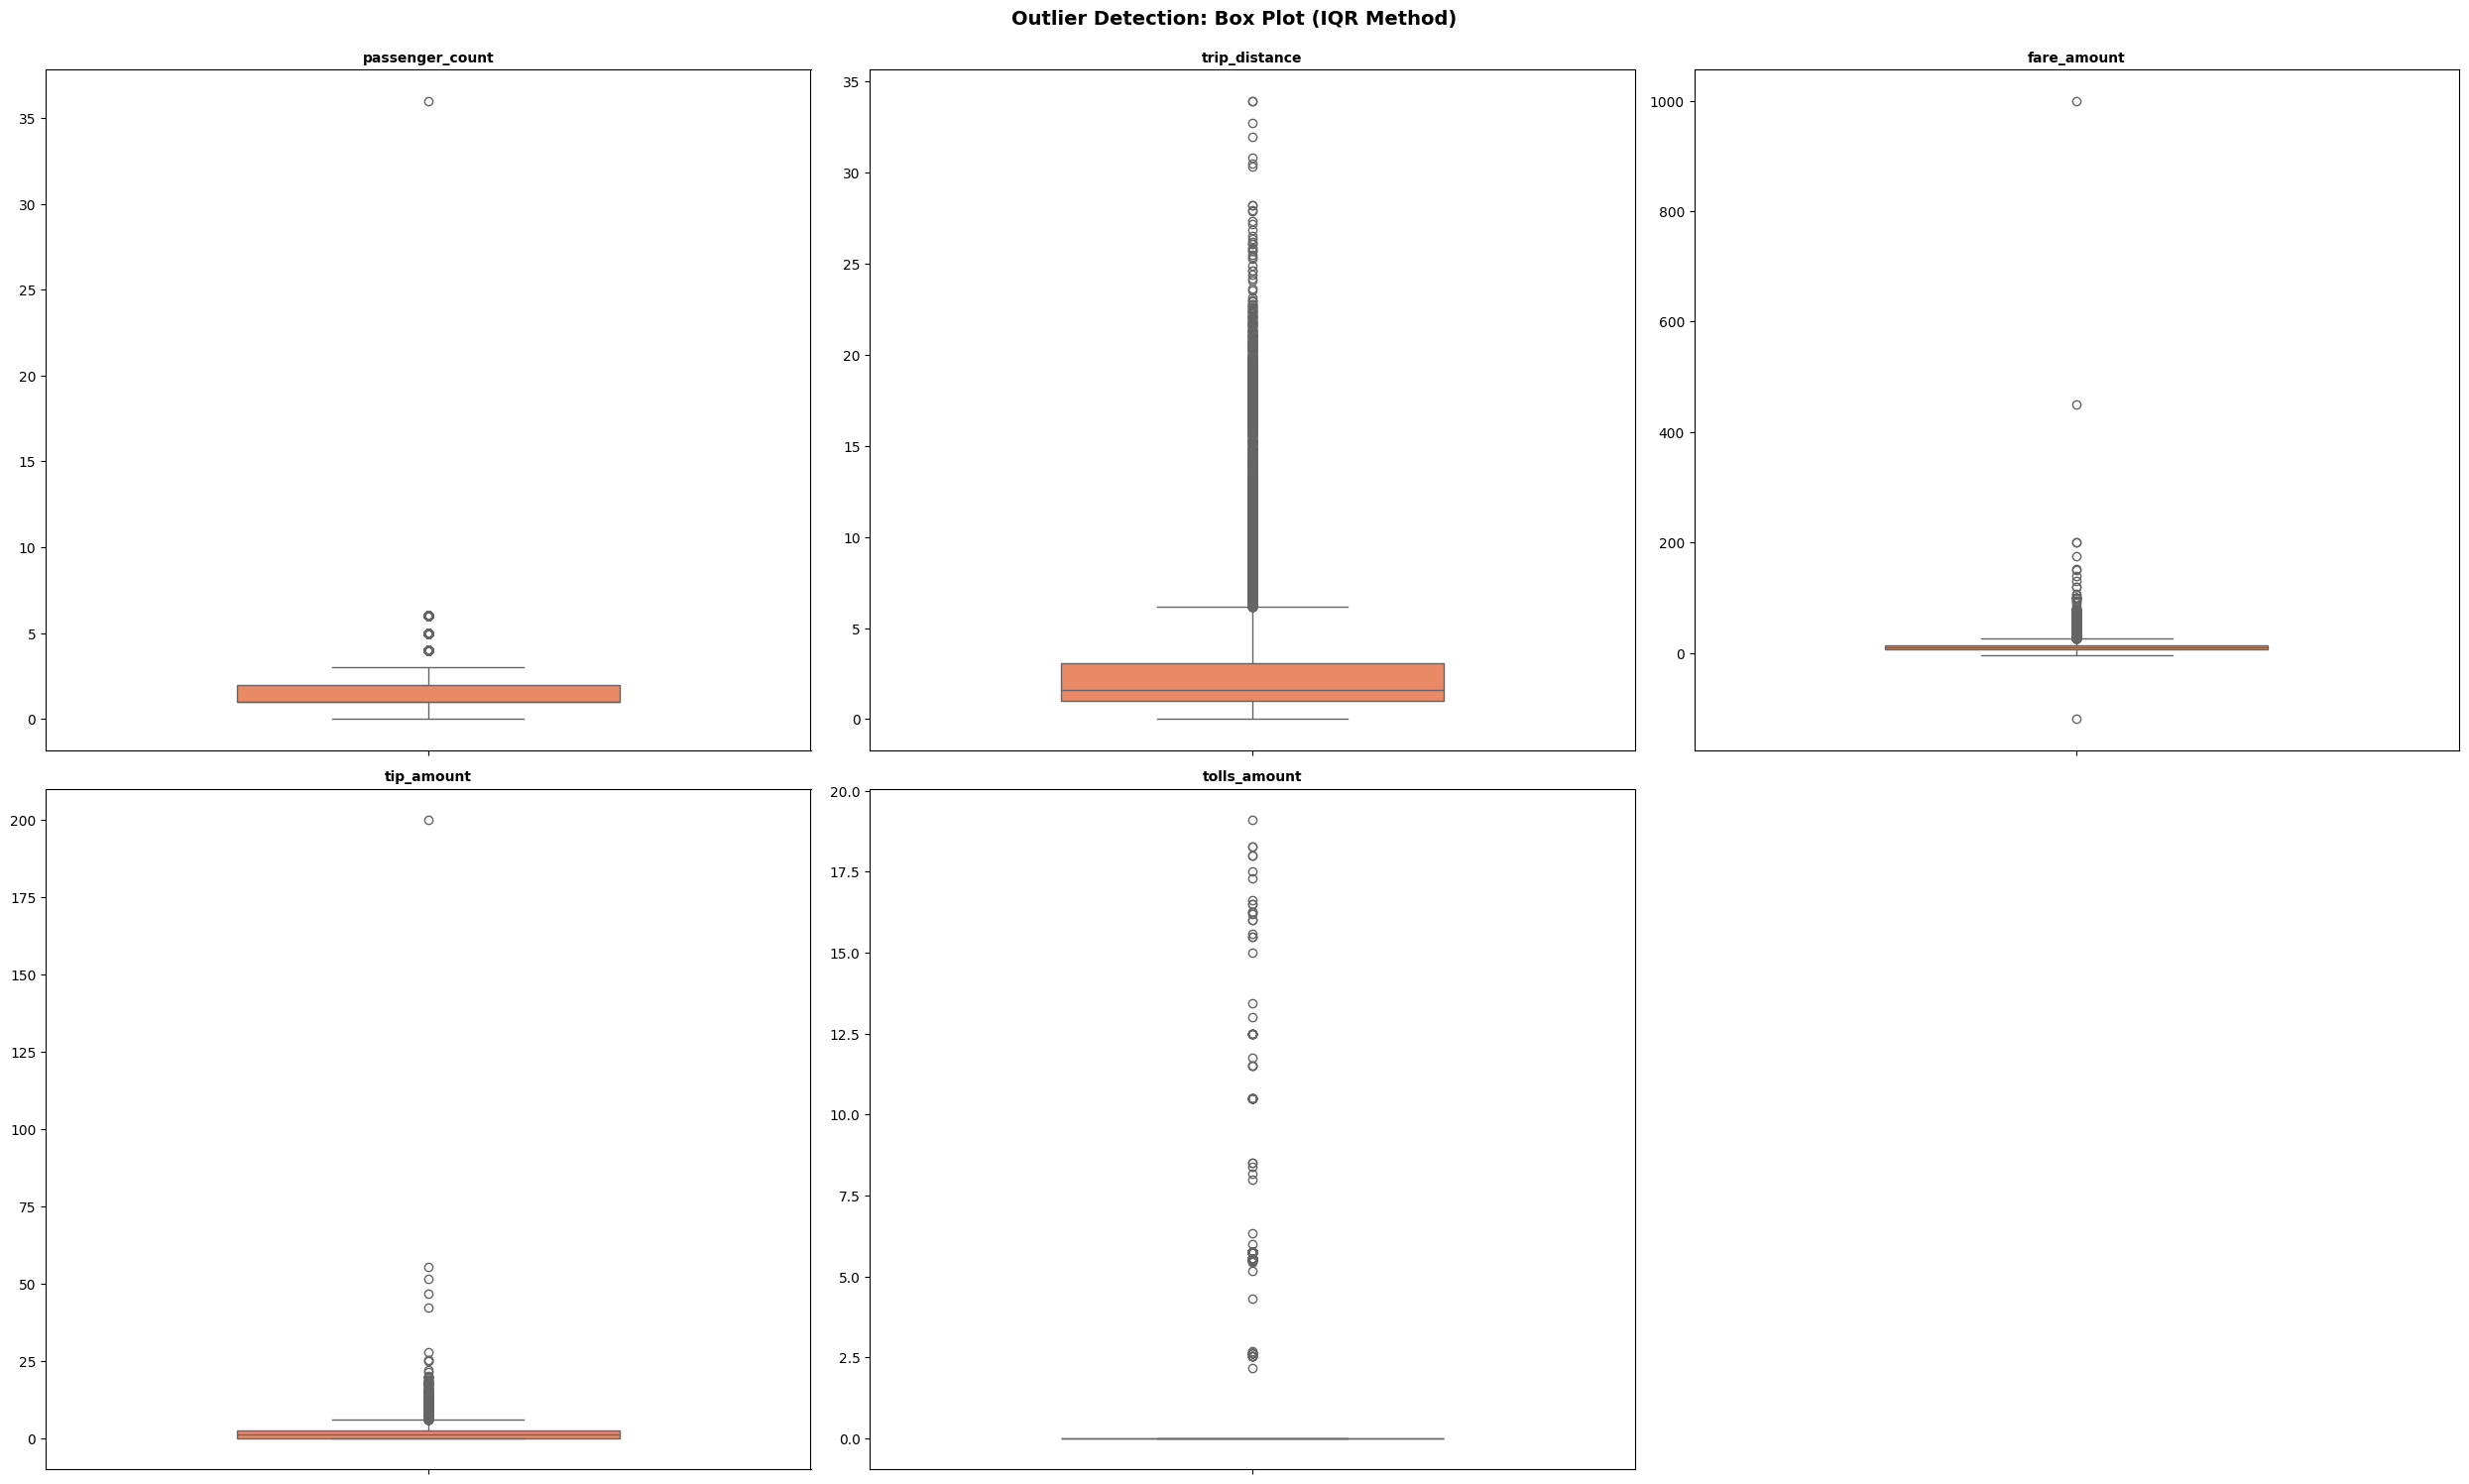


📊 Outlier Summary (IQR Method):


,Feature,Outlier_Count,Outlier_Ratio(%)
1,trip_distance,2527,11.13
0,passenger_count,2291,10.09
2,fare_amount,2062,9.08
3,tip_amount,1186,5.22
4,tolls_amount,1174,5.17



💡 [Decision]
- 이상치 비율이 10% 초과하는 자료를 확인할 수 있으나, 추가적인 분석을 한 후 제거여부를 결정합니다.
- trip_distance의 경우, 장거리 운행 등을 예상할 수 있으므로, Winsorization(99% percentile로 capping)적용을 고려합니다.


In [38]:
# 숫자형 변수 boxplot 그래프 표현

fig, axes = plt.subplots(2, 3, figsize=(25, 15))
axes = axes.ravel()

outlier_summary = []

for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.boxplot(y=df_trip[col], ax=ax, color='coral', width=0.5)
    ax.set_title(f'{col}', fontsize=10, fontweight='bold')
    ax.set_ylabel('')

    # IQR 기반 이상치 계산
    Q1 = df_trip[col].quantile(0.25)
    Q3 = df_trip[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_trip[(df_trip[col] < lower) | (df_trip[col] > upper)]
    outlier_count = len(outliers)
    outlier_ratio = outlier_count / len(df_trip) * 100

    outlier_summary.append({
        'Feature': col,
        'Outlier_Count': outlier_count,
        'Outlier_Ratio(%)': round(outlier_ratio, 2)
    })

# 빈 subplot 제거
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Outlier Detection: Box Plot (IQR Method)', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# 이상치 요약
outlier_df_trip = pd.DataFrame(outlier_summary).sort_values('Outlier_Count', ascending=False)
print("\n📊 Outlier Summary (IQR Method):")
display(outlier_df_trip)

print("\n💡 [Decision]")
print(f"- 이상치 비율이 10% 초과하는 자료를 확인할 수 있으나, 추가적인 분석을 한 후 제거여부를 결정합니다.")
print(f"- trip_distance의 경우, 장거리 운행 등을 예상할 수 있으므로, Winsorization(99% percentile로 capping)적용을 고려합니다.")

---
**Boxplot 결과 해석**    
  
- passenger_count :    
  - 이상치 개수 : 2,291건  
  - 극단적 이상치 : 고객수 0과 36  
    -> 데이터 오류일 확률이 높다. 특히 승차인원 36명이라는 자료는 '택시'라는 차량적 특성 상 승차인원이 36명일 수는 없다.     
- trip_distance :  
  - 이상치 개수 : 2,527건  
  - 운행 거리가 0인 경우, 시스템 오류일 가능성이 높고, 75% 이상 범위에 분포하는 경우에는 장거리 운행기록으로 볼 수 있을 것이다.     
- fare_amount :   
  - 이상치 개수 : 2,062건  
  - 음수값 : 결제취소 또는 환불처리된 내역으로 추정해 볼 수 있다.  
  - 0원 : 어떠한 이유로 고객에게 이용요금을 받지 않은 경우일 수 있으므로 다른 변수와 함께 추가적으로 분석해 볼 여지가 있다.     
- tip_amount :  
  - 이상치 개수 : 1,186건  
  - tip 지불이 택시이용에 있어 필수가 아니기 때문에 해당 데이터에서 0이라는 값은 정상으로 본다. Tip이라는 것이 서비스 이용에 대해 만족도를 추가적인 금액으로 지불하여 표현한 것으로 추후 이용거리, 승객인원수와 함께 분석을 한다면, 택시매출을 예상하는 데 도움이 될 수 있다.     
- tolls_amount :   
  - 이상치 개수 : 1,174건   
  - 일반적으로 택시를 이용함에 있어 근거리 이용이 많고, 장거리 이용(toll 비용 발생)하는 경우가 드물다. 이용거리와 함께 상관관계를 확인해보는 것이 필요하다. 

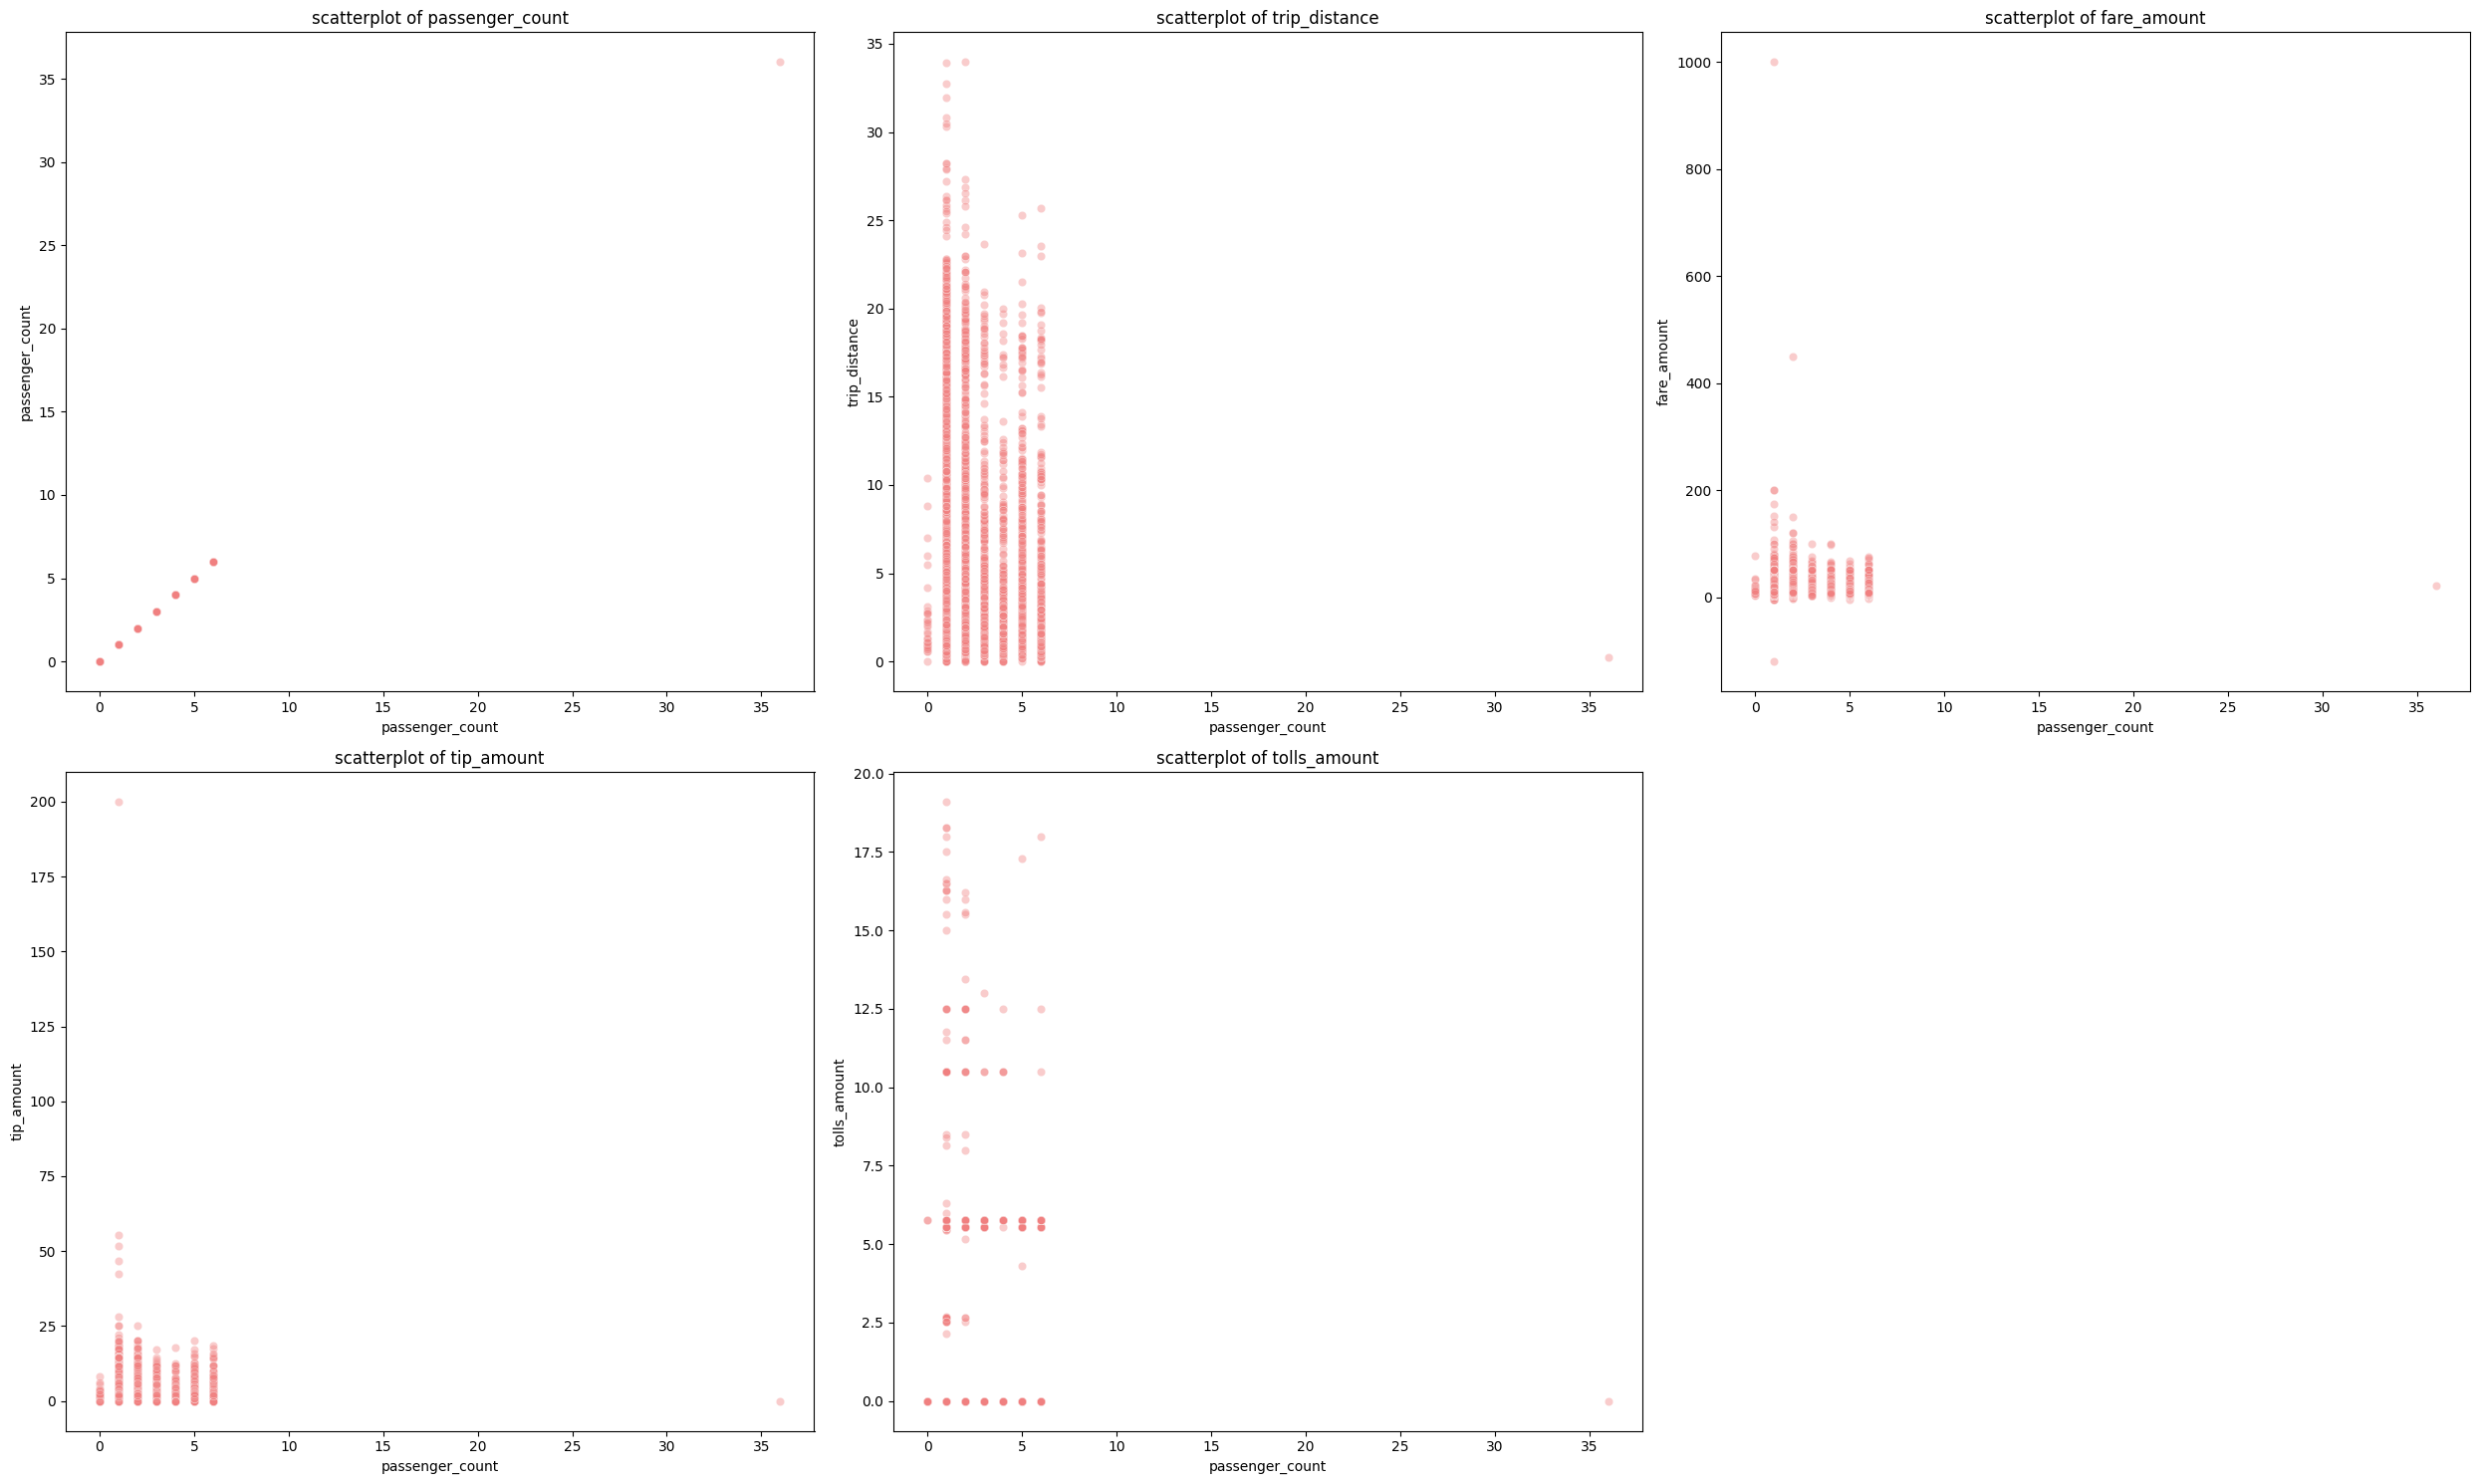

In [ ]:
# scatterplot을 이용한 이상치에 대한 추가 분석 

# 'passenger_count'와 나머지 숫자형 변수와 비교
plt.figure(figsize=(25,15))
for i, col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x='passenger_count',y=df_trip[col], data=df_trip, color='lightcoral', alpha=0.4)
    plt.title(f'scatterplot of {col}')
plt.tight_layout()
plt.show()

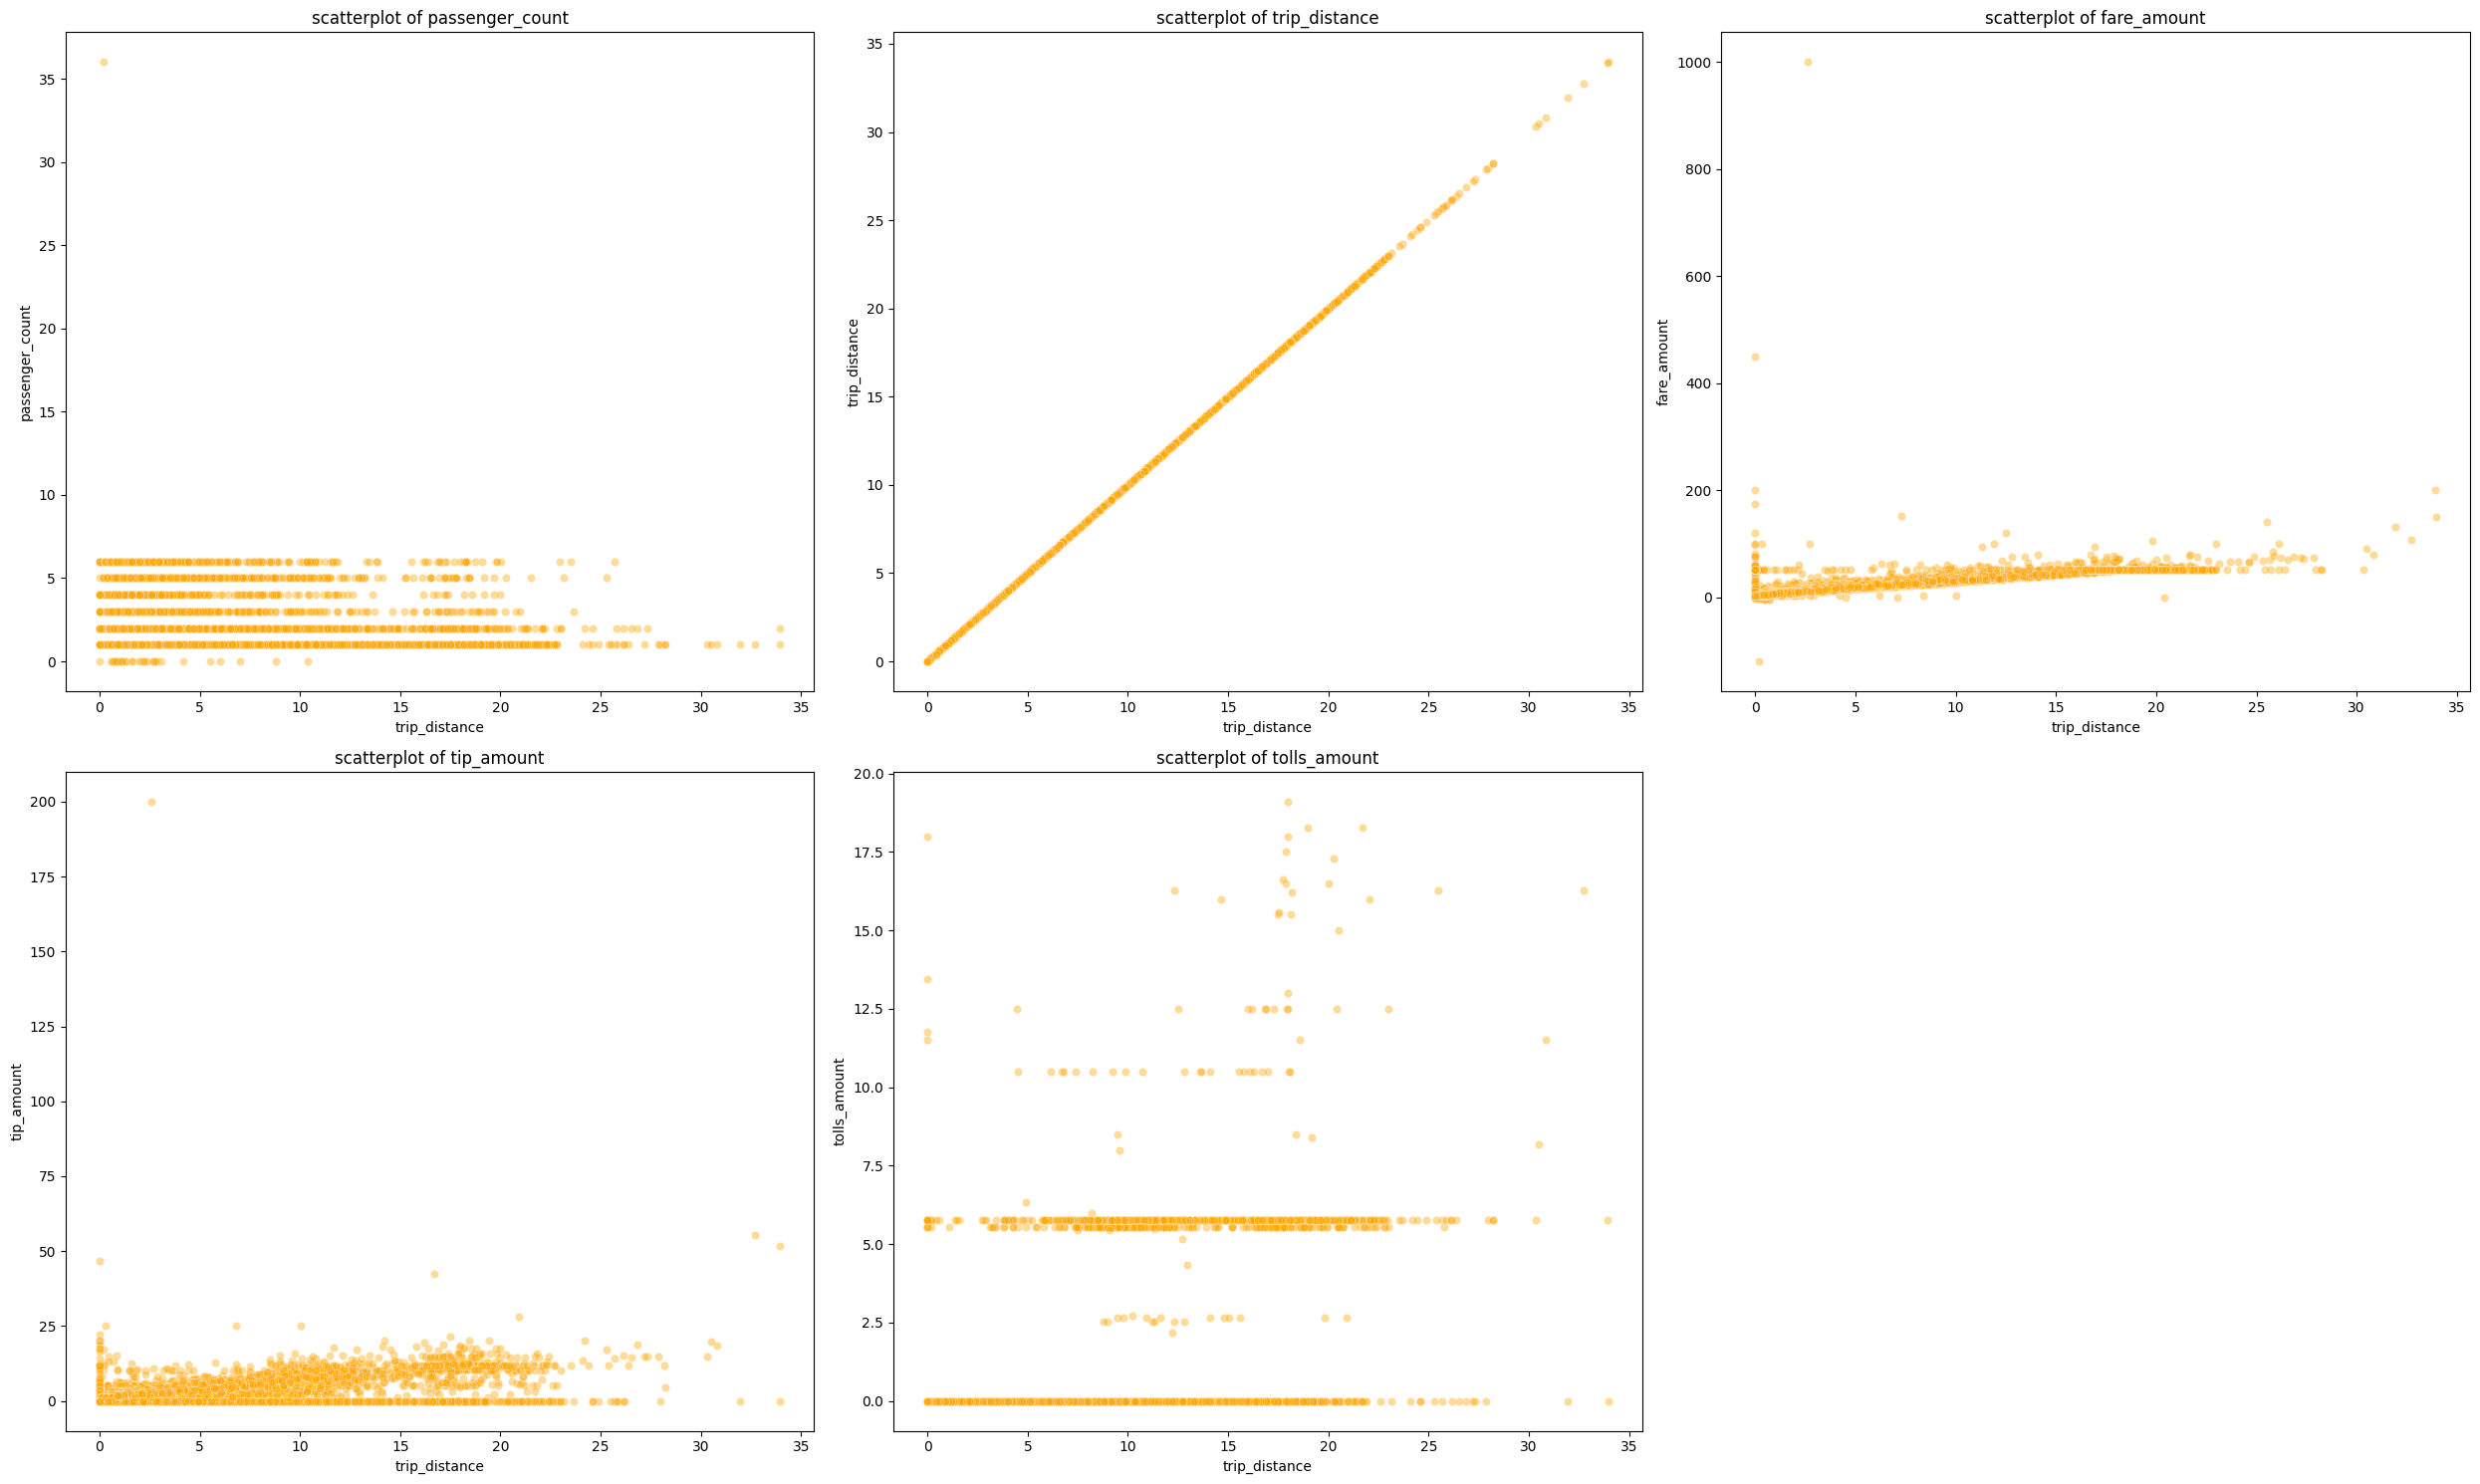

In [ ]:
# 'trip_distance'와 나머지 숫자형 변수와 비교
plt.figure(figsize=(25,15))
for i, col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x='trip_distance',y=df_trip[col], data=df_trip, color='orange', alpha=0.4)
    plt.title(f'scatterplot of {col}')
plt.tight_layout()
plt.show()

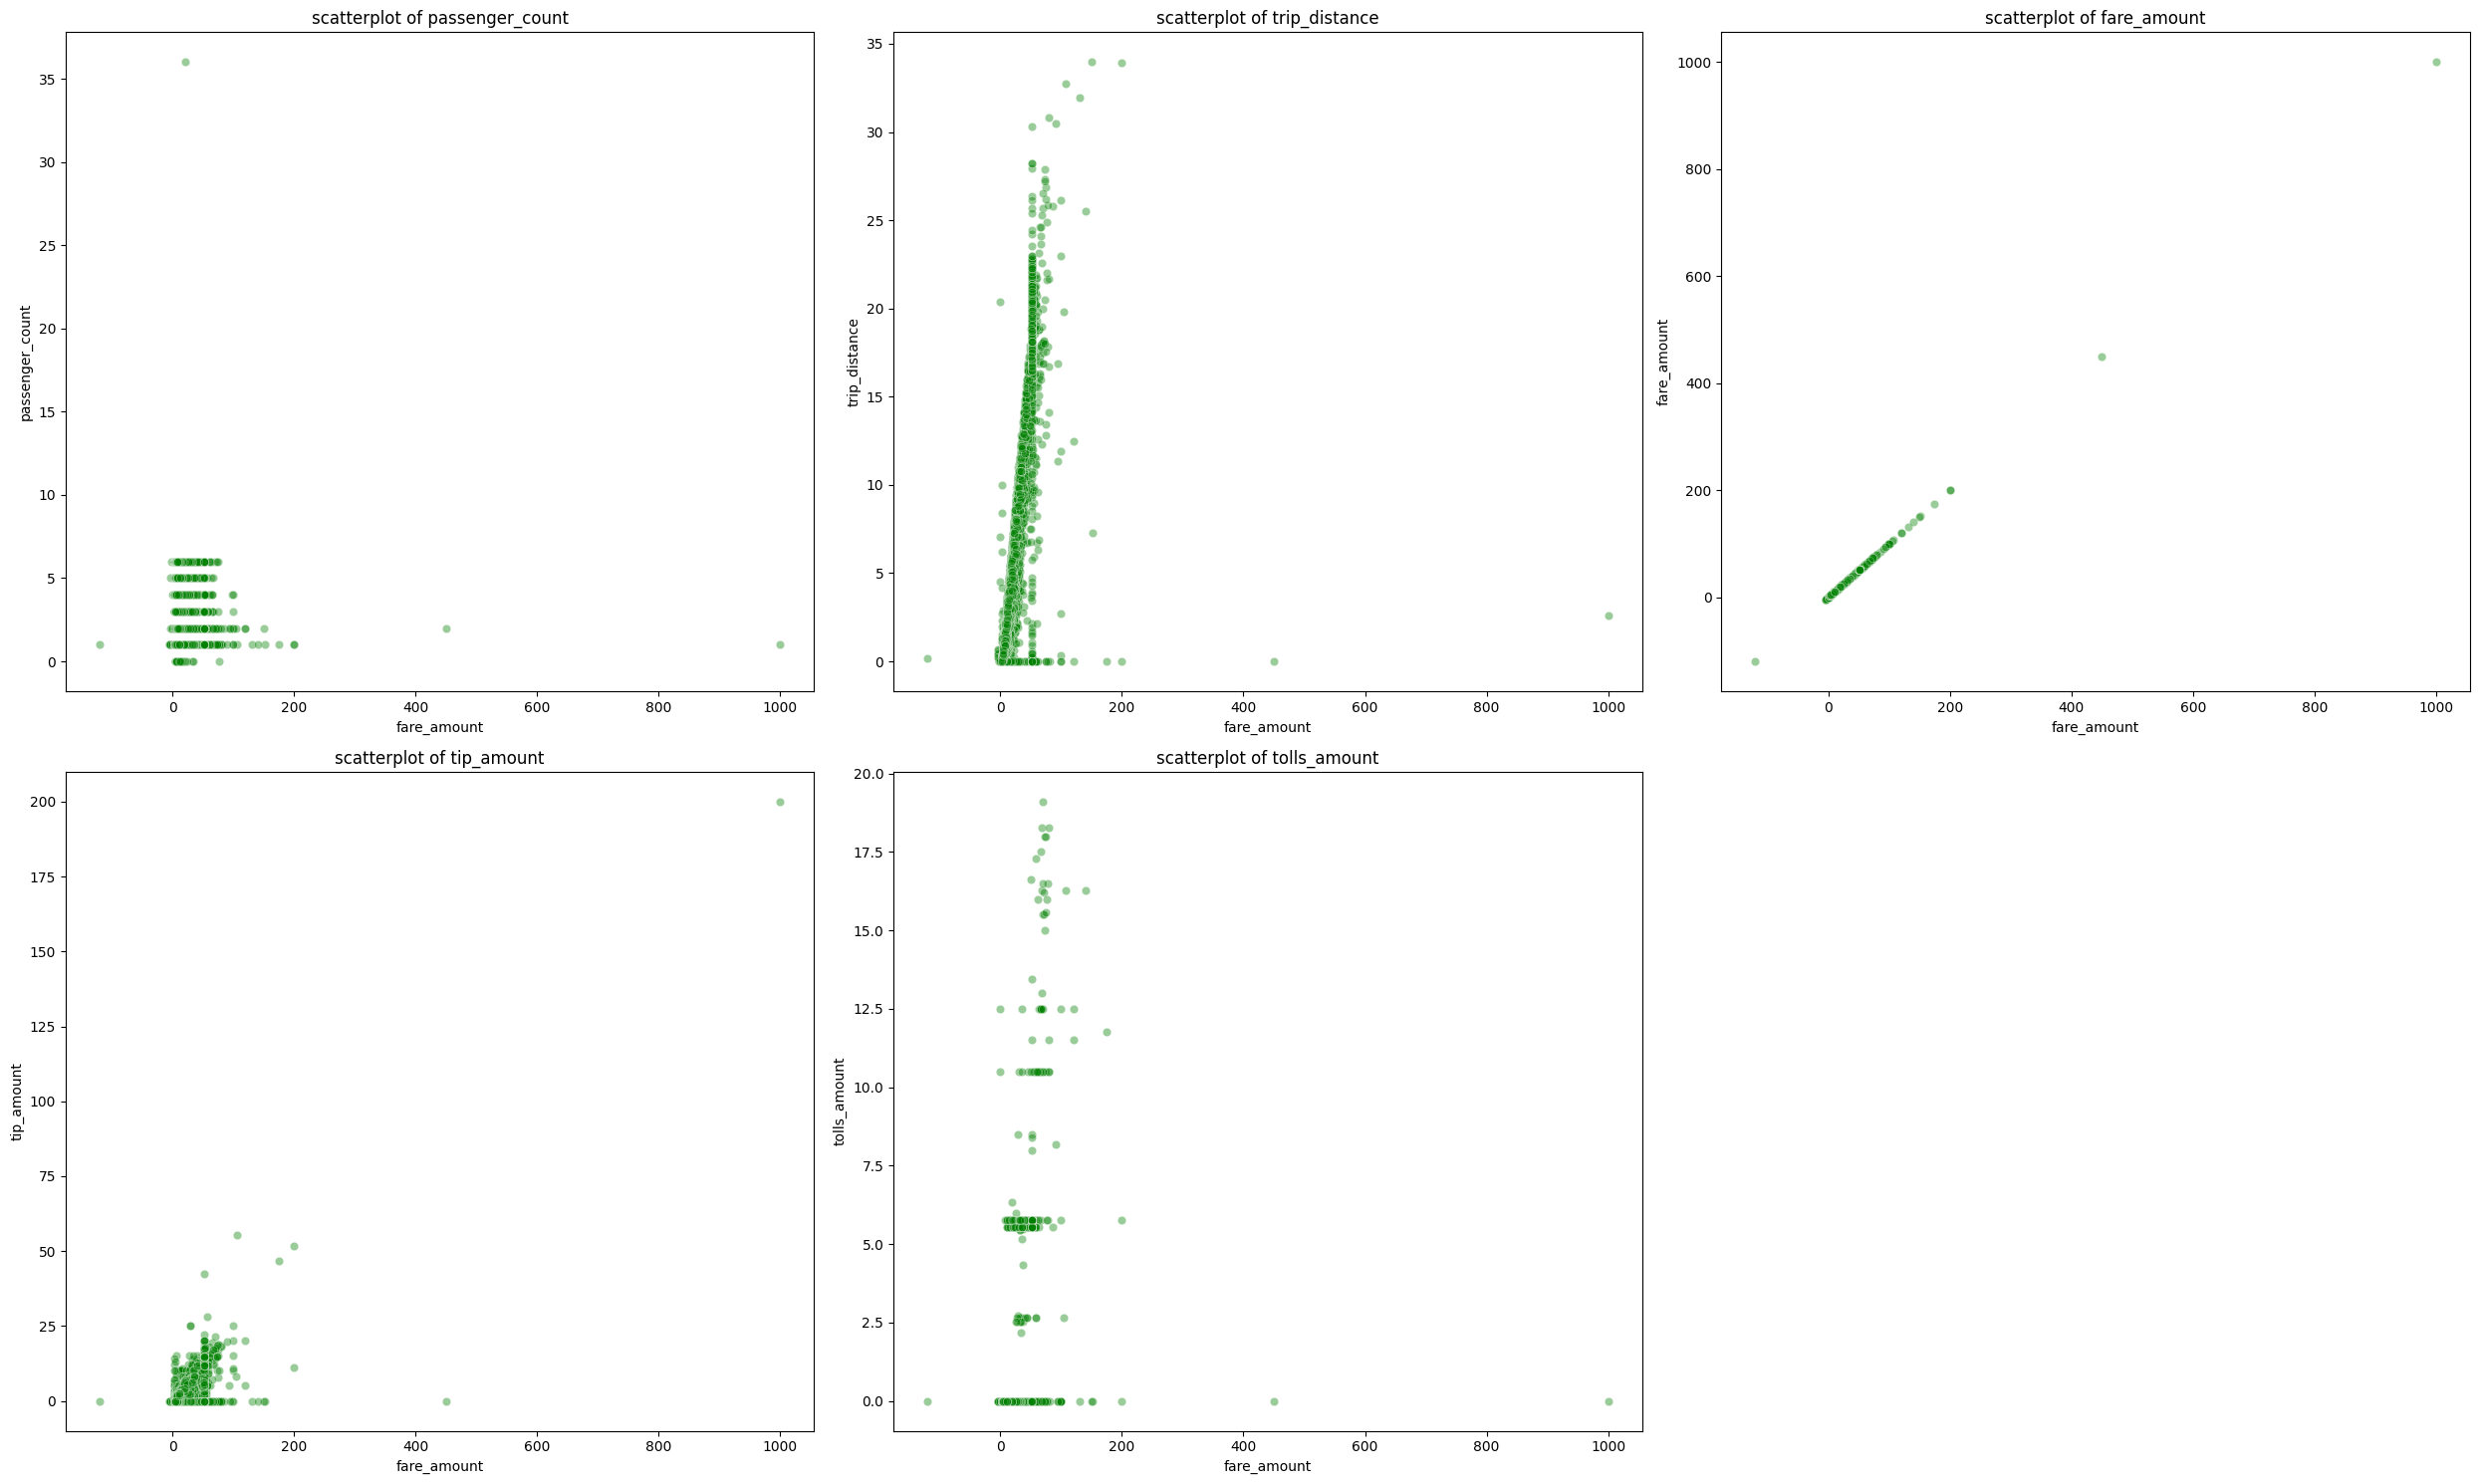

In [44]:
# 'fare_amount'와 나머지 숫자형 변수와 비교
plt.figure(figsize=(25,15))
for i, col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x='fare_amount',y=df_trip[col], data=df_trip, color='green', alpha=0.4)
    plt.title(f'scatterplot of {col}')
plt.tight_layout()
plt.show()

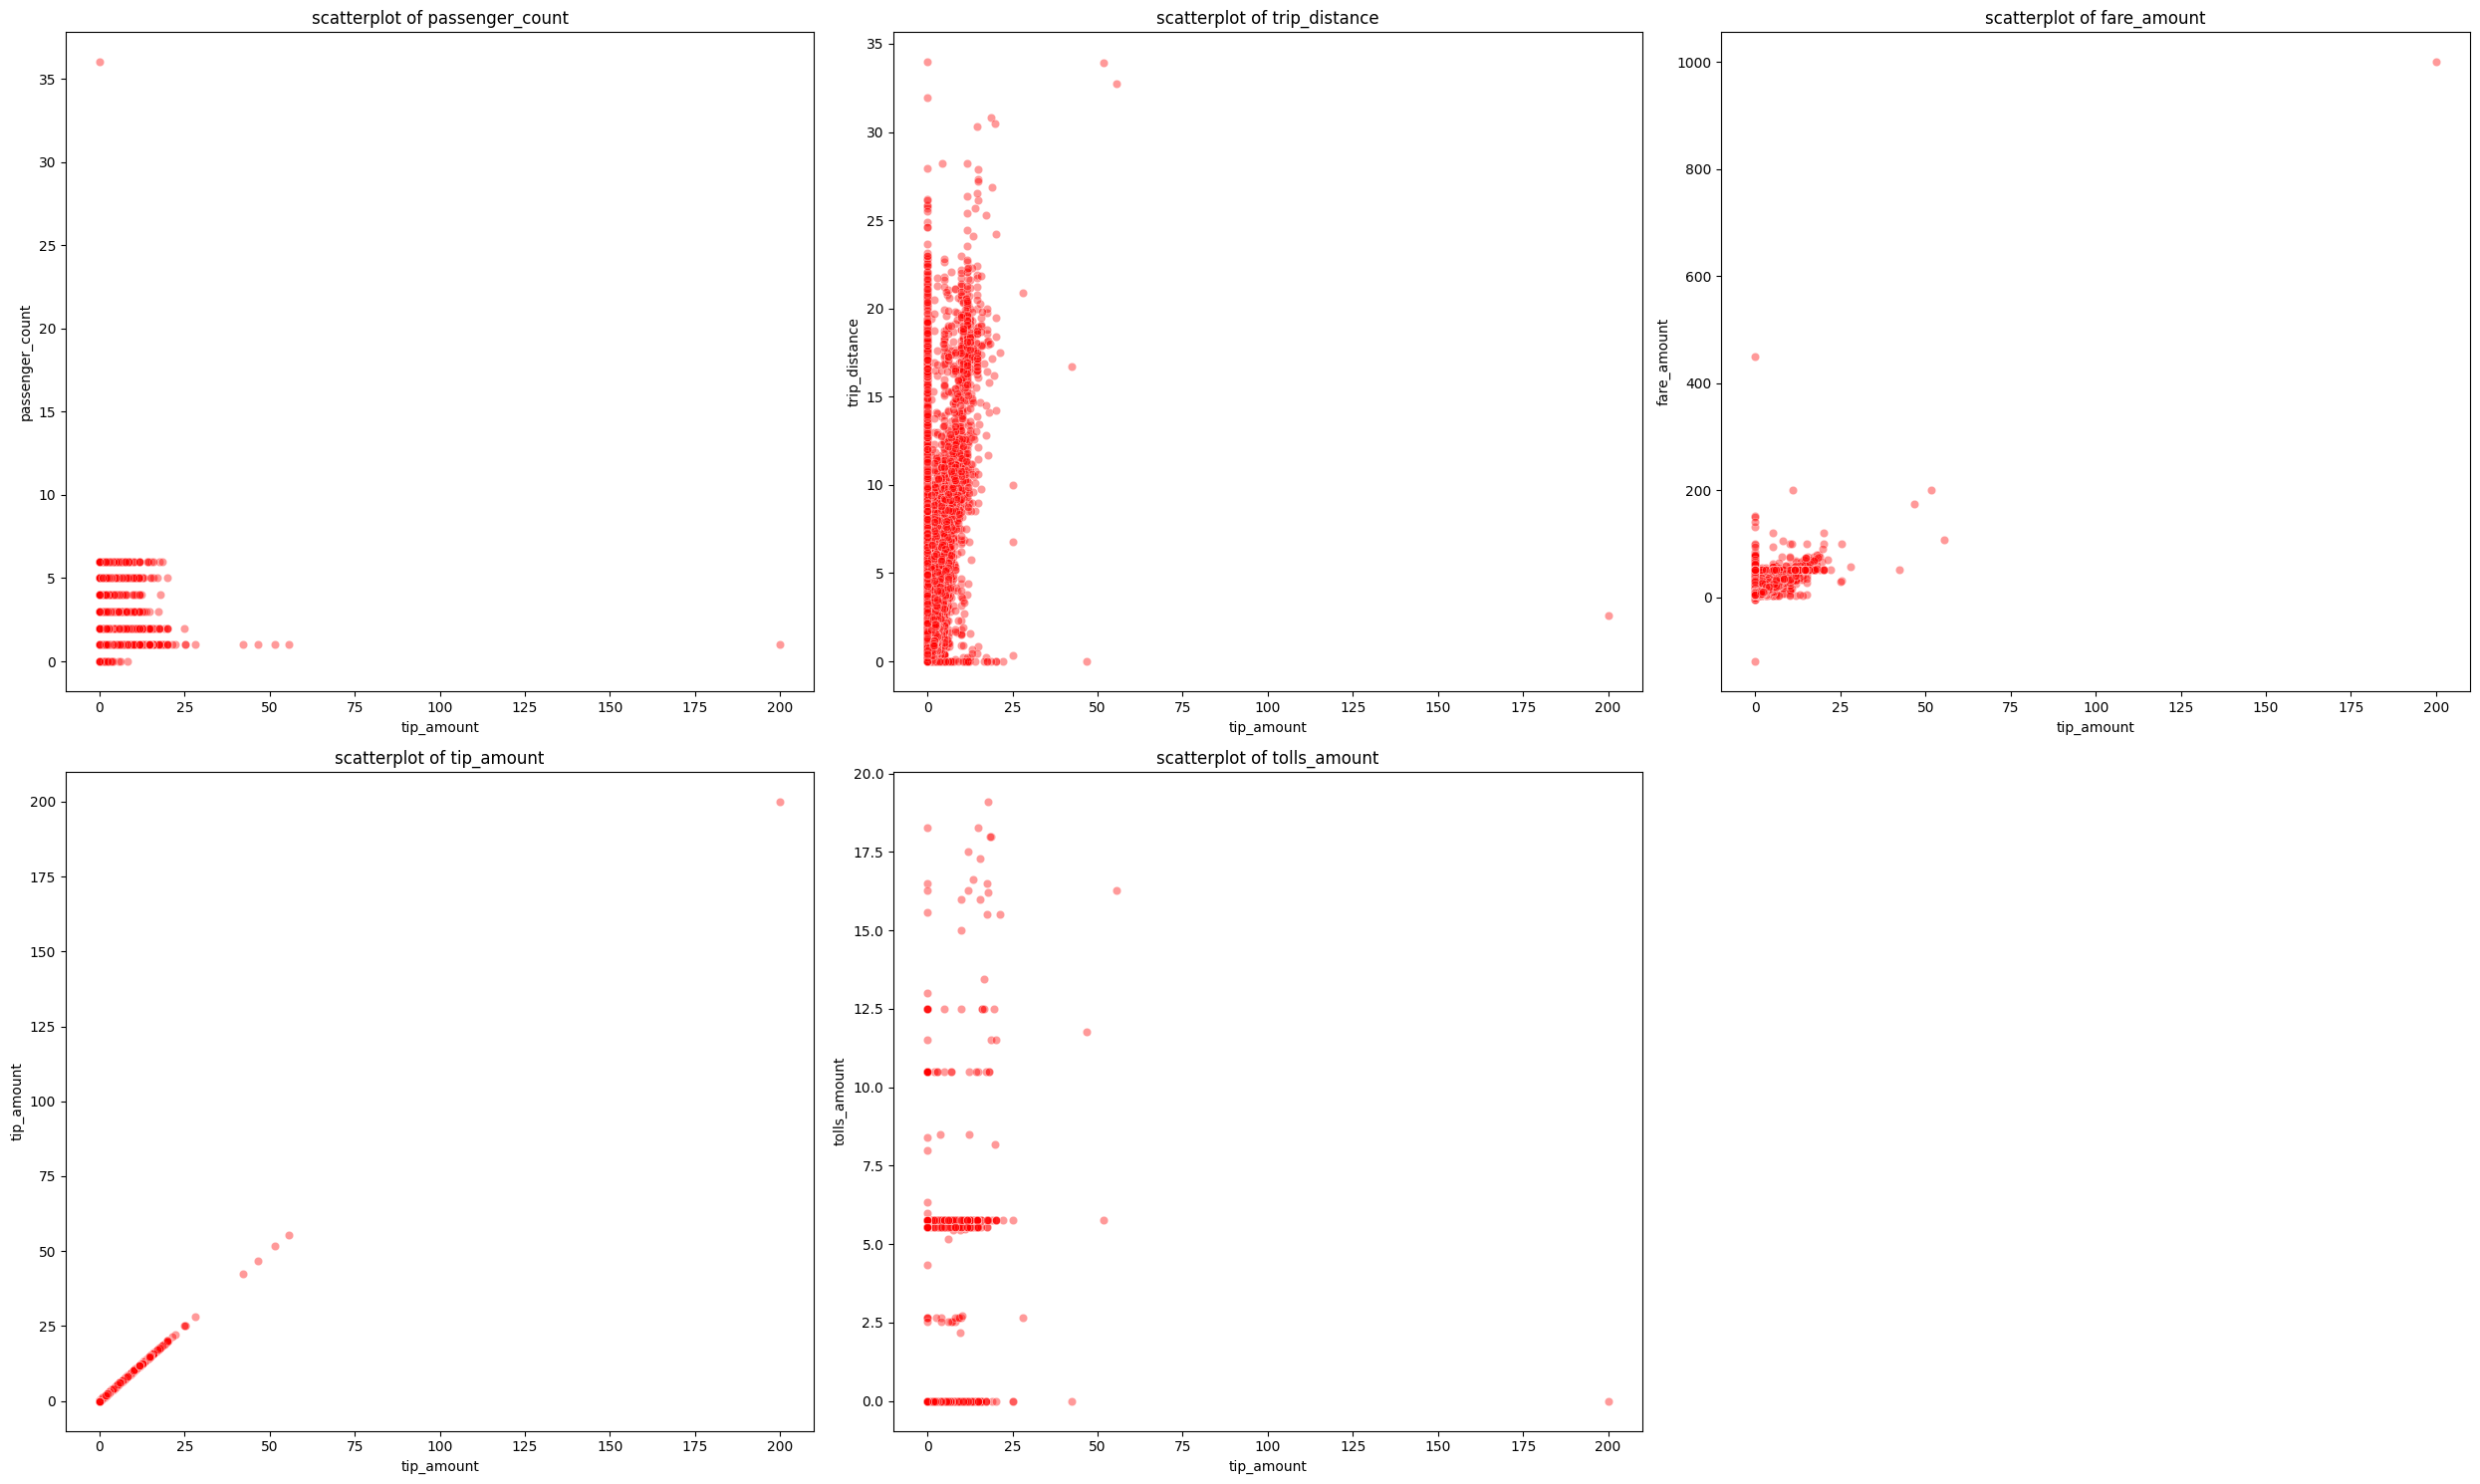

In [36]:
# 'tip_amount'와 나머지 숫자형 변수와 비교
plt.figure(figsize=(25,15))
for i, col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x='tip_amount',y=df_trip[col], data=df_trip, color='red', alpha=0.4)
    plt.title(f'scatterplot of {col}')
plt.tight_layout()
plt.show()

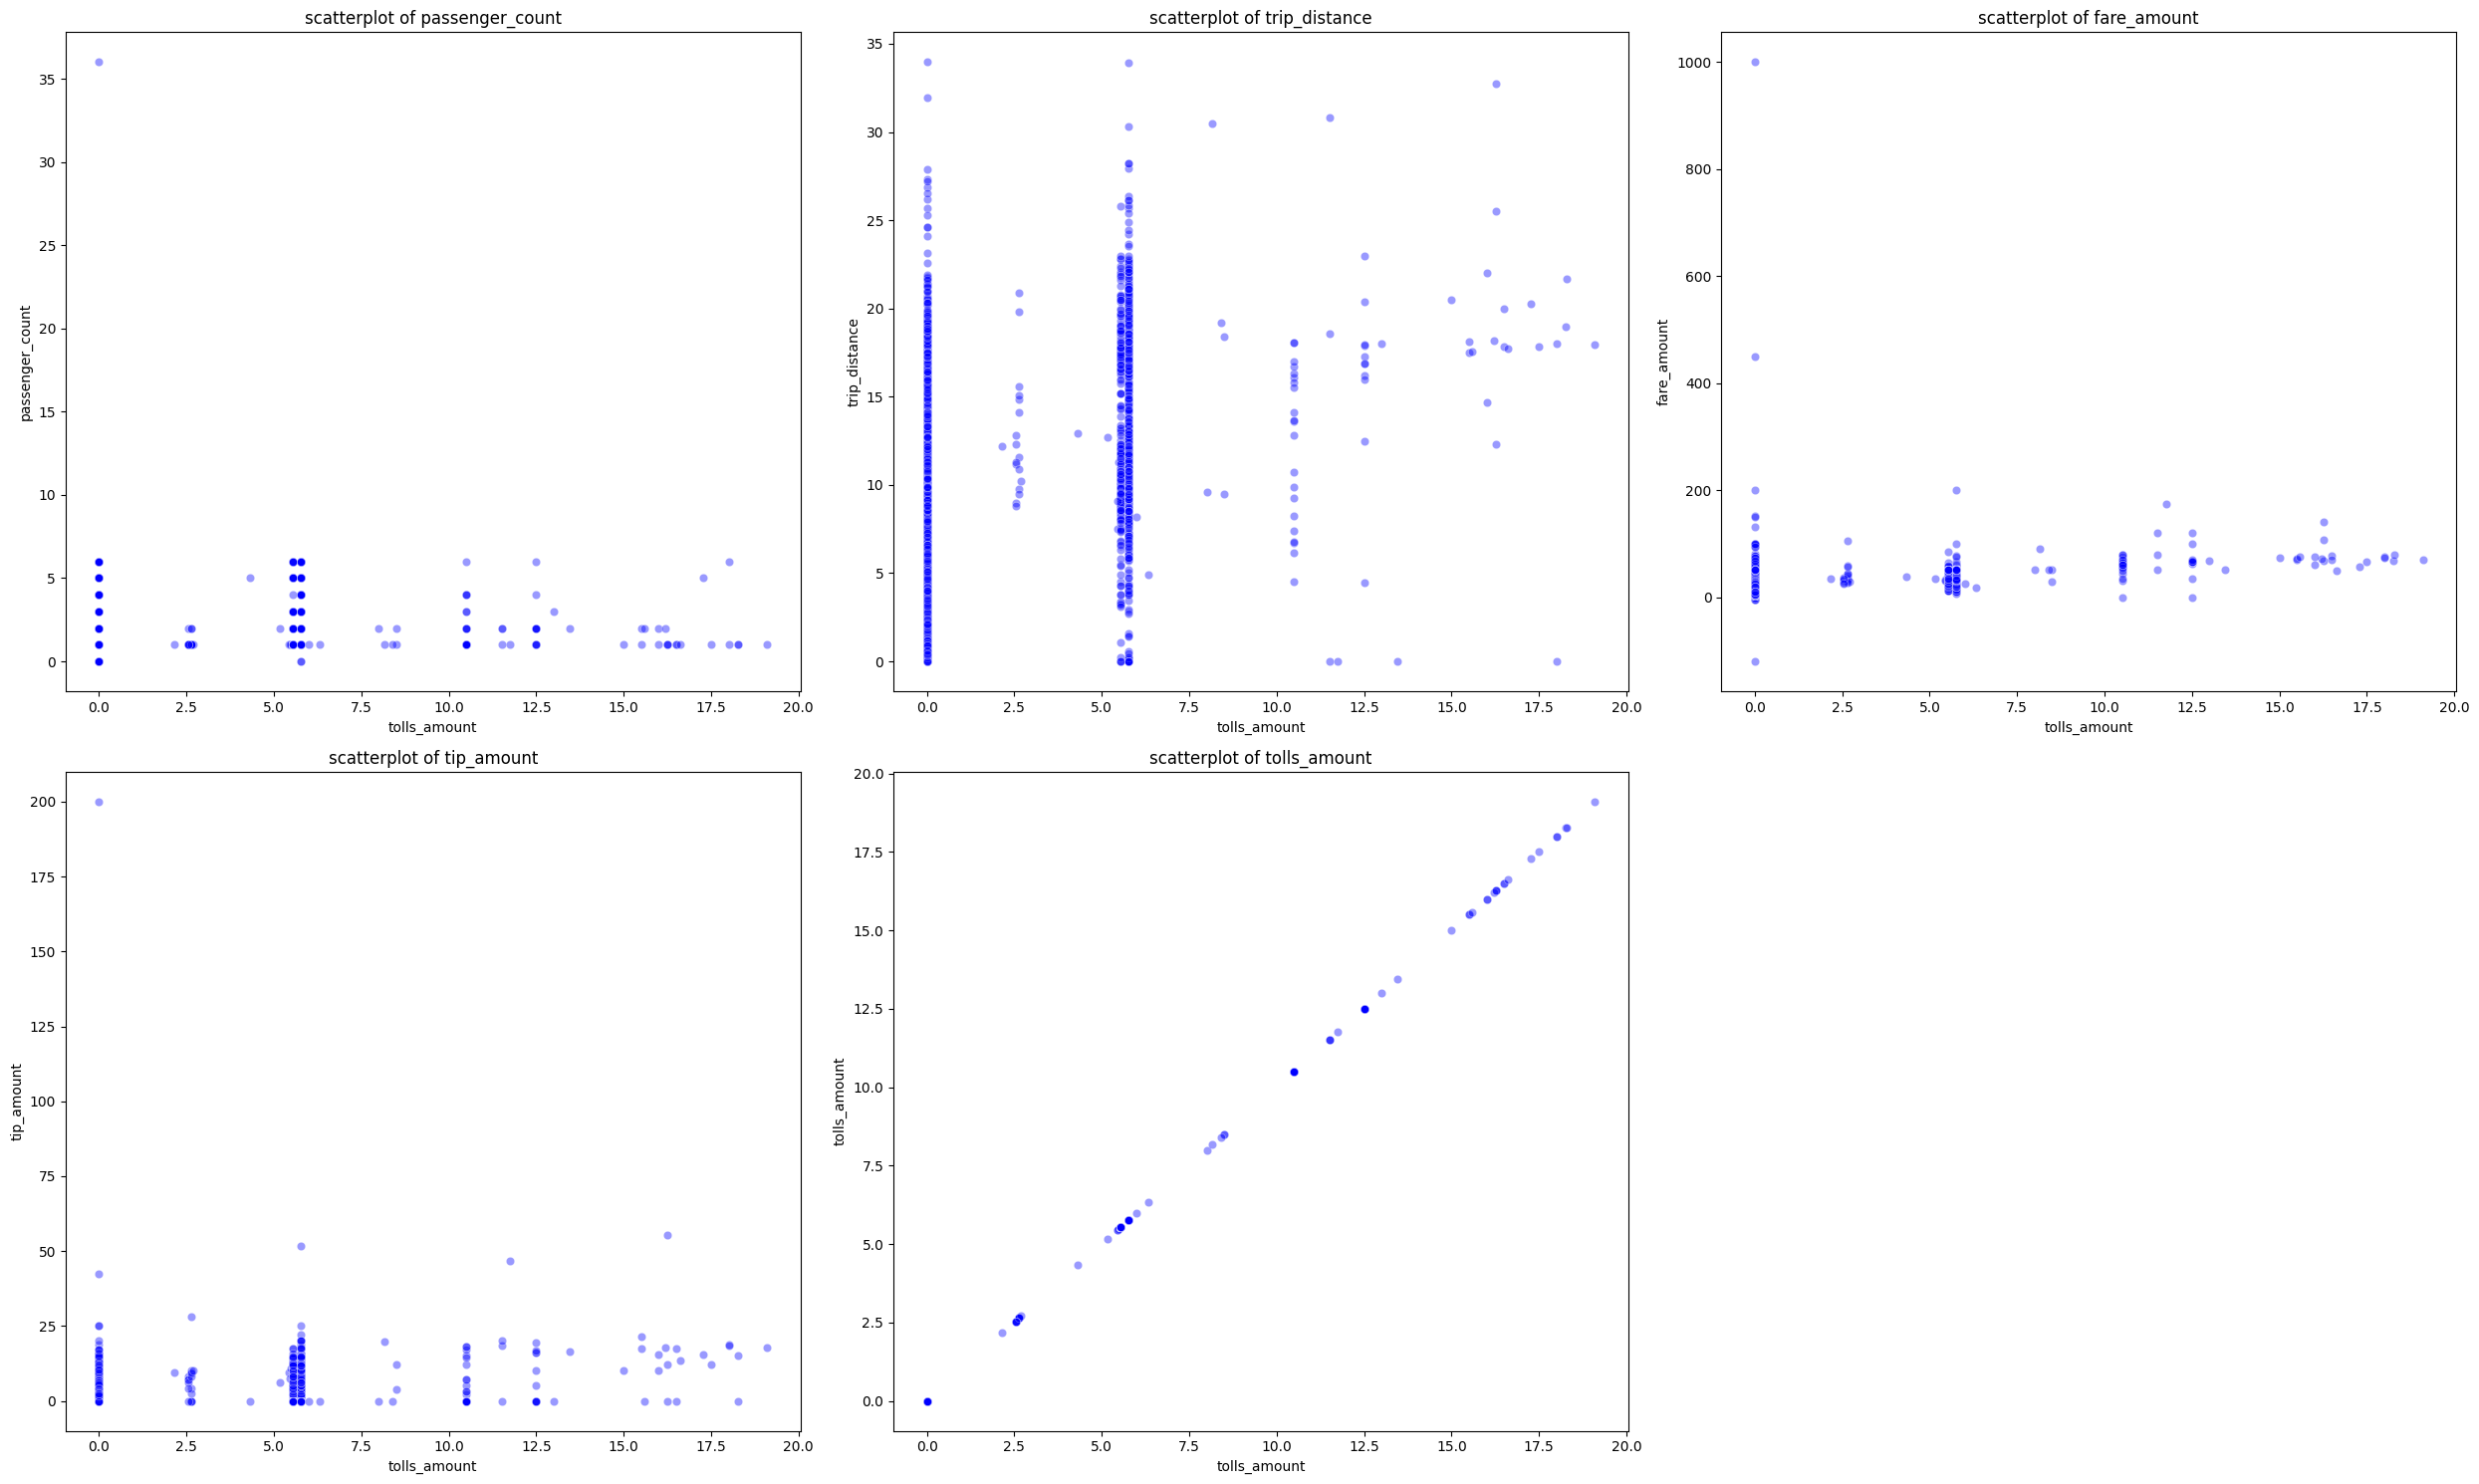

In [45]:
# 'tolls_amount'와 나머지 숫자형 변수와 비교
plt.figure(figsize=(25,15))
for i, col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x='tolls_amount',y=df_trip[col], data=df_trip, color='blue', alpha=0.4)
    plt.title(f'scatterplot of {col}')
plt.tight_layout()
plt.show()

**Scatter plot 결과 해석_boxplot에서 확인한 내역 외 추가 사항**    
  
- passenger_count :    
  - 극단적 이상치 : 고객수 0과 36  
    -> 운행거리(trip_distance)와 운행요금(fare_amount)이 '0'임에도 불구하고 고객수가 발생한다는 점에서 시스템 오류임을 확인할 수 있다.   
    -> 탑승인원 36명인 경우, 다른 수치형 변수값이 모두 '0'임을 확인하였다.   
    => **승객수 데이터 처리 구간 : 1 ~ 6명 (※36명 데이터 제거)** 
- trip_distance :  
  - 운행 거리가 0이면서, 이용요금이나 tip, tolls 비용이 확인되는 경우, 운행거리 측정 시스템 오류일 가능성이 높다.   
  - 극단적인 장거리 운행에 있어서 분포를 확인하고 cap을 설정한다.   
- fare_amount :   
  => 추가적으로 이용거리가 '0'인 경우, 해당 데이터제거 / (-) 요금의 경우, 환불자료로 별도로 구분하여 분석 진행       
- tip_amount :  
  - tip 지불이 운행거리 전반에 걸쳐 분포하는 것을 확인할 수 있다.
  => **극단적인 tip amount 만 데이터 제거**, 나머지는 유지한다. (tip_amount 200 / fare_amount 999.99)
- tolls_amount :   
  - 이용거리와 함께 분포를 확인하였을 때, 이용거리와 이용요금이 모두 '0'인 경우는 없는 것으로 확인하였다. 해당 자료의 이상치는 유지한다.  


##### **1-2-2. 이상치 제거**  
  
위 과정에서 얻은 특징을 통해, 이상치를 제거한다. 

- **passenger_count** : 승객인원 36명인 데이터 제거 (1건) 
- **trip_distance** :   
  1. 운행거리가 0이면서, 추가적인 tip amount와 tolls amount 가 0인 데이터 제거 (94건) 
  2. 극단적인 장거리 이용객(상위 1%)에 대한 자료 제거  
- **fare_amount** :  
  1. 이용금액이 음수(-)/0인 고객에 대한 자료 별도로 분리 (20건) 
    - 결제 취소/환불기록 : 카드 승인 후 취소 가능  
    - 요금 조정 : 기사/회사 측 오류 수정, 거리/요금 재계산 등  
    - 테스트/ 시스템 로그 데이터 : 실제 승차가 아닌 내부 기록 가능  
      (승객수가 2인 이상인 경우, 취소 사항이었다면, 이용내역에 대한 추가적인 결제내역을 확인할 수 있었을 것이나, 해당 자료에서 이름이 중복된 경우가 없고, 승객수가 1인 자료가 확인되는 것으로 보아 **결제 자체가 무효처리된 거래**의 가능성이 높다. )  
  2. 앞선 trip_distance 항목에서 이용거리와 이용요금이 모두 '0'인 고객 데이터 제거  
     ※ 단순히 fare_amount 가 '0'인 경우에는 데이터 오류일 것으로 추정
- **tip_amount** : 극단적인 tip과 fare 금액 자료 (tip_amount 200 / fare_amount 999.99) 제거 

In [102]:
# 원본데이터와 데이터클리닝 데이터 분리
df_trip_clean = df_trip.copy()

# 데이터 클리닝
# 환불/무효 거래 데이터 분리 (20건)
df_trip_refund = df_trip_clean[df_trip_clean['fare_amount'] <= 0].copy()

# 정상 요금 데이터만 남김 ('fare_amount' 항목 중 결측치 3개 값 자동 제외)
df_trip_clean = df_trip_clean[df_trip_clean['fare_amount'] > 0].copy()

# 승객수 36명 데이터 제거 (1건 : 'passenger_count'<=6)
df_trip_clean = df_trip_clean[df_trip_clean['passenger_count'] < 7].copy()

# 실제 운행이 발생하지 않은 기록(94건 : 'trip_distance'=0 and 'tip_amount'=0 and 'tolls_amount'=0) 제거
df_trip_clean = df_trip_clean[
    ~((df_trip_clean['trip_distance'] == 0) &
    (df_trip_clean['tip_amount'] == 0) &
    (df_trip_clean['tolls_amount'] == 0))
].copy()

# 극단적인 장거리 데이터(상위 1%) 제거 분리(221건) 
distance_99 = df_trip_clean['trip_distance'].copy().quantile(0.99)
df_trip_clean = df_trip_clean[df_trip_clean['trip_distance'] <= distance_99].copy()

# 극단적인 tip 200 자료 삭제 (1건)
df_trip_clean = df_trip_clean[df_trip_clean['tip_amount'] < 200].copy()

print('🔍클리닝 결과 점검 ')
print("* 원본:", df_trip.shape)
print("* 환불/무효 거래:", df_trip_refund.shape)
print("* 최종 분석 데이터:", df_trip_clean.shape)

🔍클리닝 결과 점검 
* 원본: (22701, 17)
* 환불/무효 거래: (20, 17)
* 최종 분석 데이터: (22361, 17)


**[데이터 클리닝 결과]**  
본 분석에서는 환불, 무효거래, 비현실적 승객수, 실제 운행이 발생하지 않은 기록, 그리고 극단적인 장거리 주행(상위 1%)을 제거하여 정상적인 택시 이용행태를 대표하는 데이터셋을 구축하였다.  

#### **1-3. 데이터 클리닝 전후 비교**  

데이터 클리닝을 통하여 데이터가 어떻게 변하였는지와 분석신뢰도가 올라갔는지 숫자형 변수 5개에 대하여 아래와 같은 방법으로 변화를 확인한다.  

1. 히스토그램 :  
   - 'tip_amount', 'trip_distance'와 같이 극단값 제거하거나 cap을 설정한 항목의 경우, 오른쪽 꼬리가 줄었는지 여부확인  
   - 'fare_amount'항목에 있어 요금이 0이거나 음수(-)인 항목이 사라졌는지 여부 확인  

2. 박스플롯 : 
   - Before에서 튀어나오던 점들이 After에서 줄어듦  
   - 박스크기(IQR)이 줄어듦 => 변동성 안정화  
    
3. 평균 비교 요약 :  
   - mean이 과도하게 줄어든 변수 : 극한값의 영향의 컸음을 확인  
   - std가 크게 감소한 변수 = 이상치에 민감했던 변수 => 분산 안정화   
   - tip_amount/ trip_distance에서 크게 나타남

In [103]:
# 비교 대상 데이터 확인 

# 클리닝 전 
df_before = df_trip.copy()

# 클리닝 후
df_after = df_trip_clean.copy()

num_cols = [
    'passenger_count',
    'trip_distance',
    'fare_amount',
    'tip_amount',
    'tolls_amount'
]

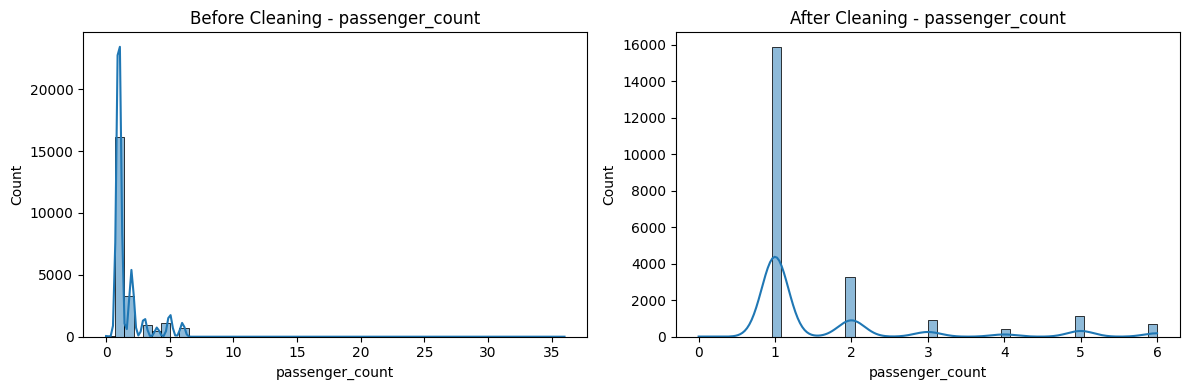

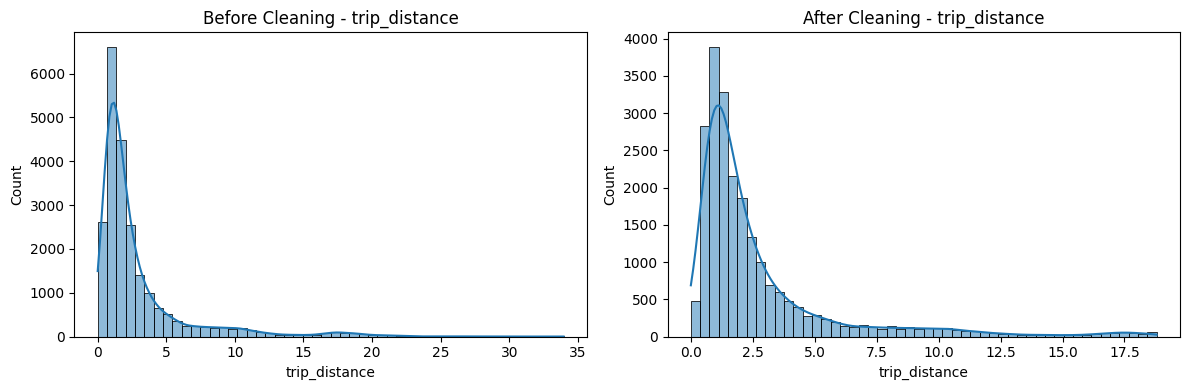

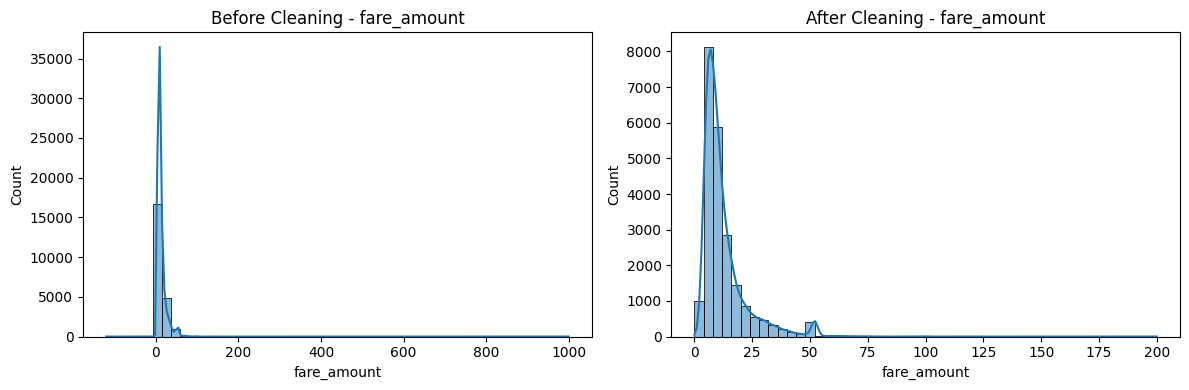

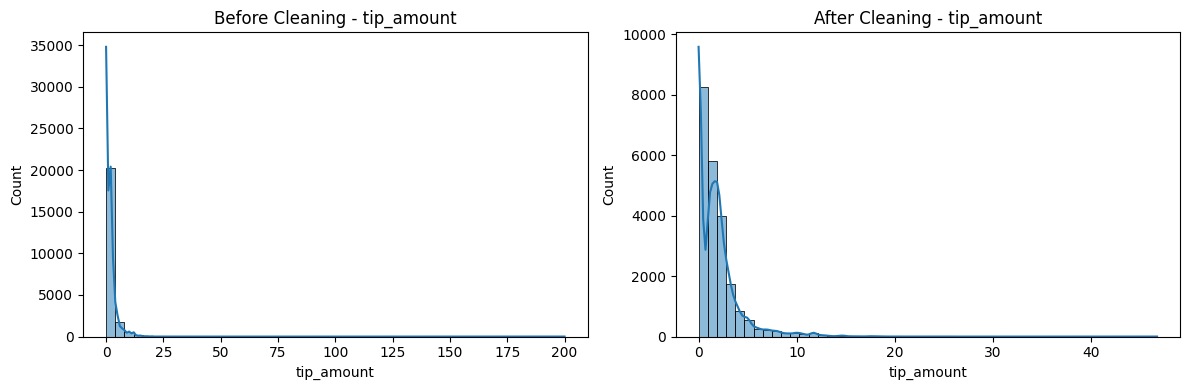

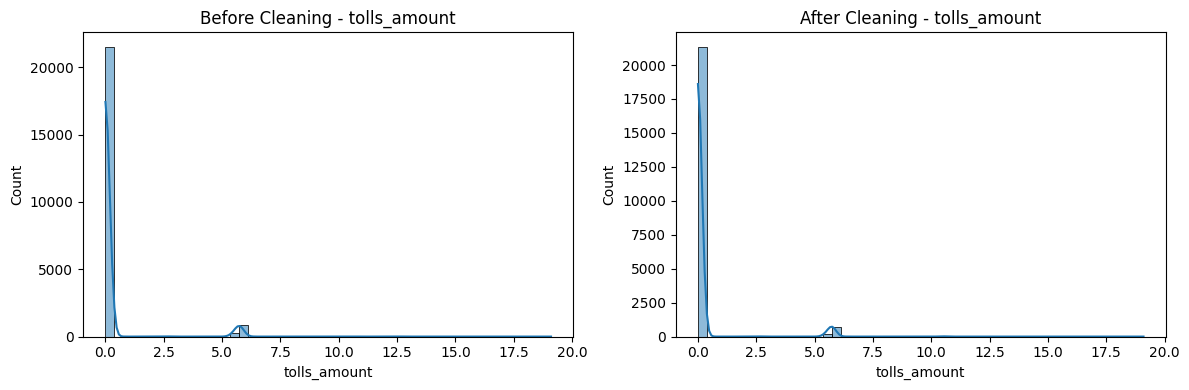

In [105]:
# 히스토그램 변화 확인 

for col in num_cols:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.histplot(df_before[col], bins=50, kde=True)
    plt.title(f'Before Cleaning - {col}')

    plt.subplot(1,2,2)
    sns.histplot(df_after[col], bins=50, kde=True)
    plt.title(f'After Cleaning - {col}')

    plt.tight_layout()
    plt.show()

📊Box Plot_Before


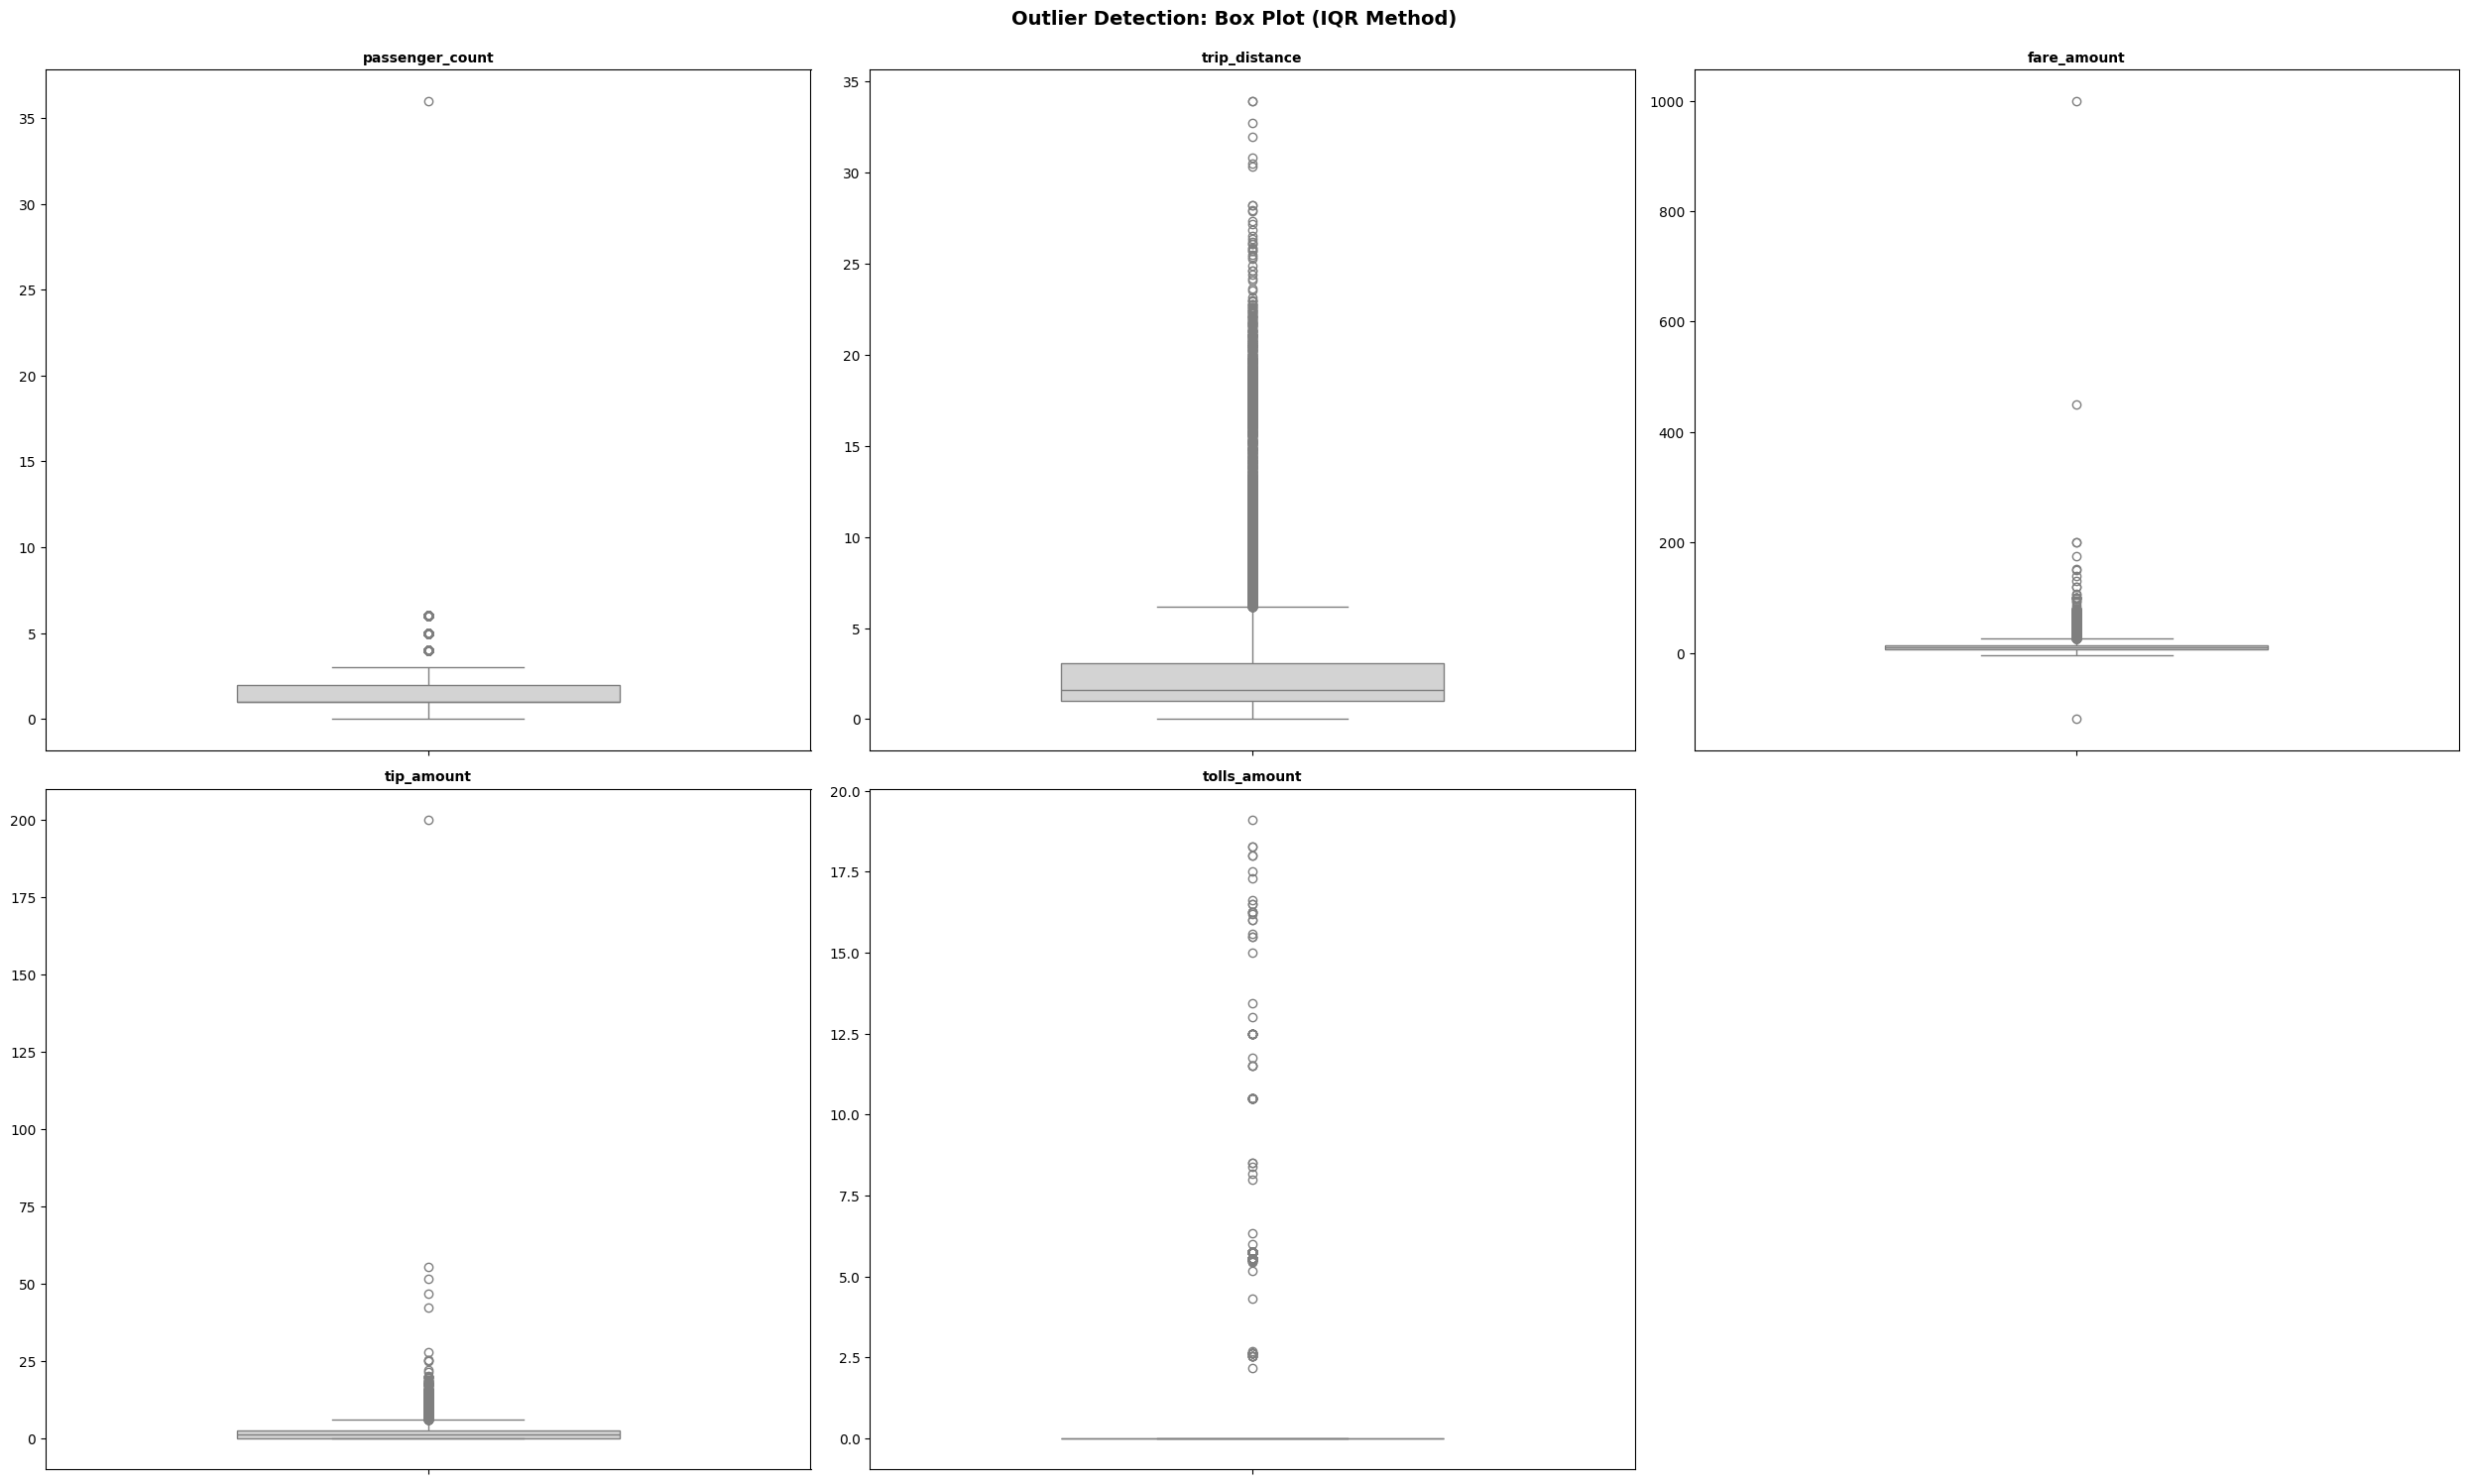

📊Box Plot_After


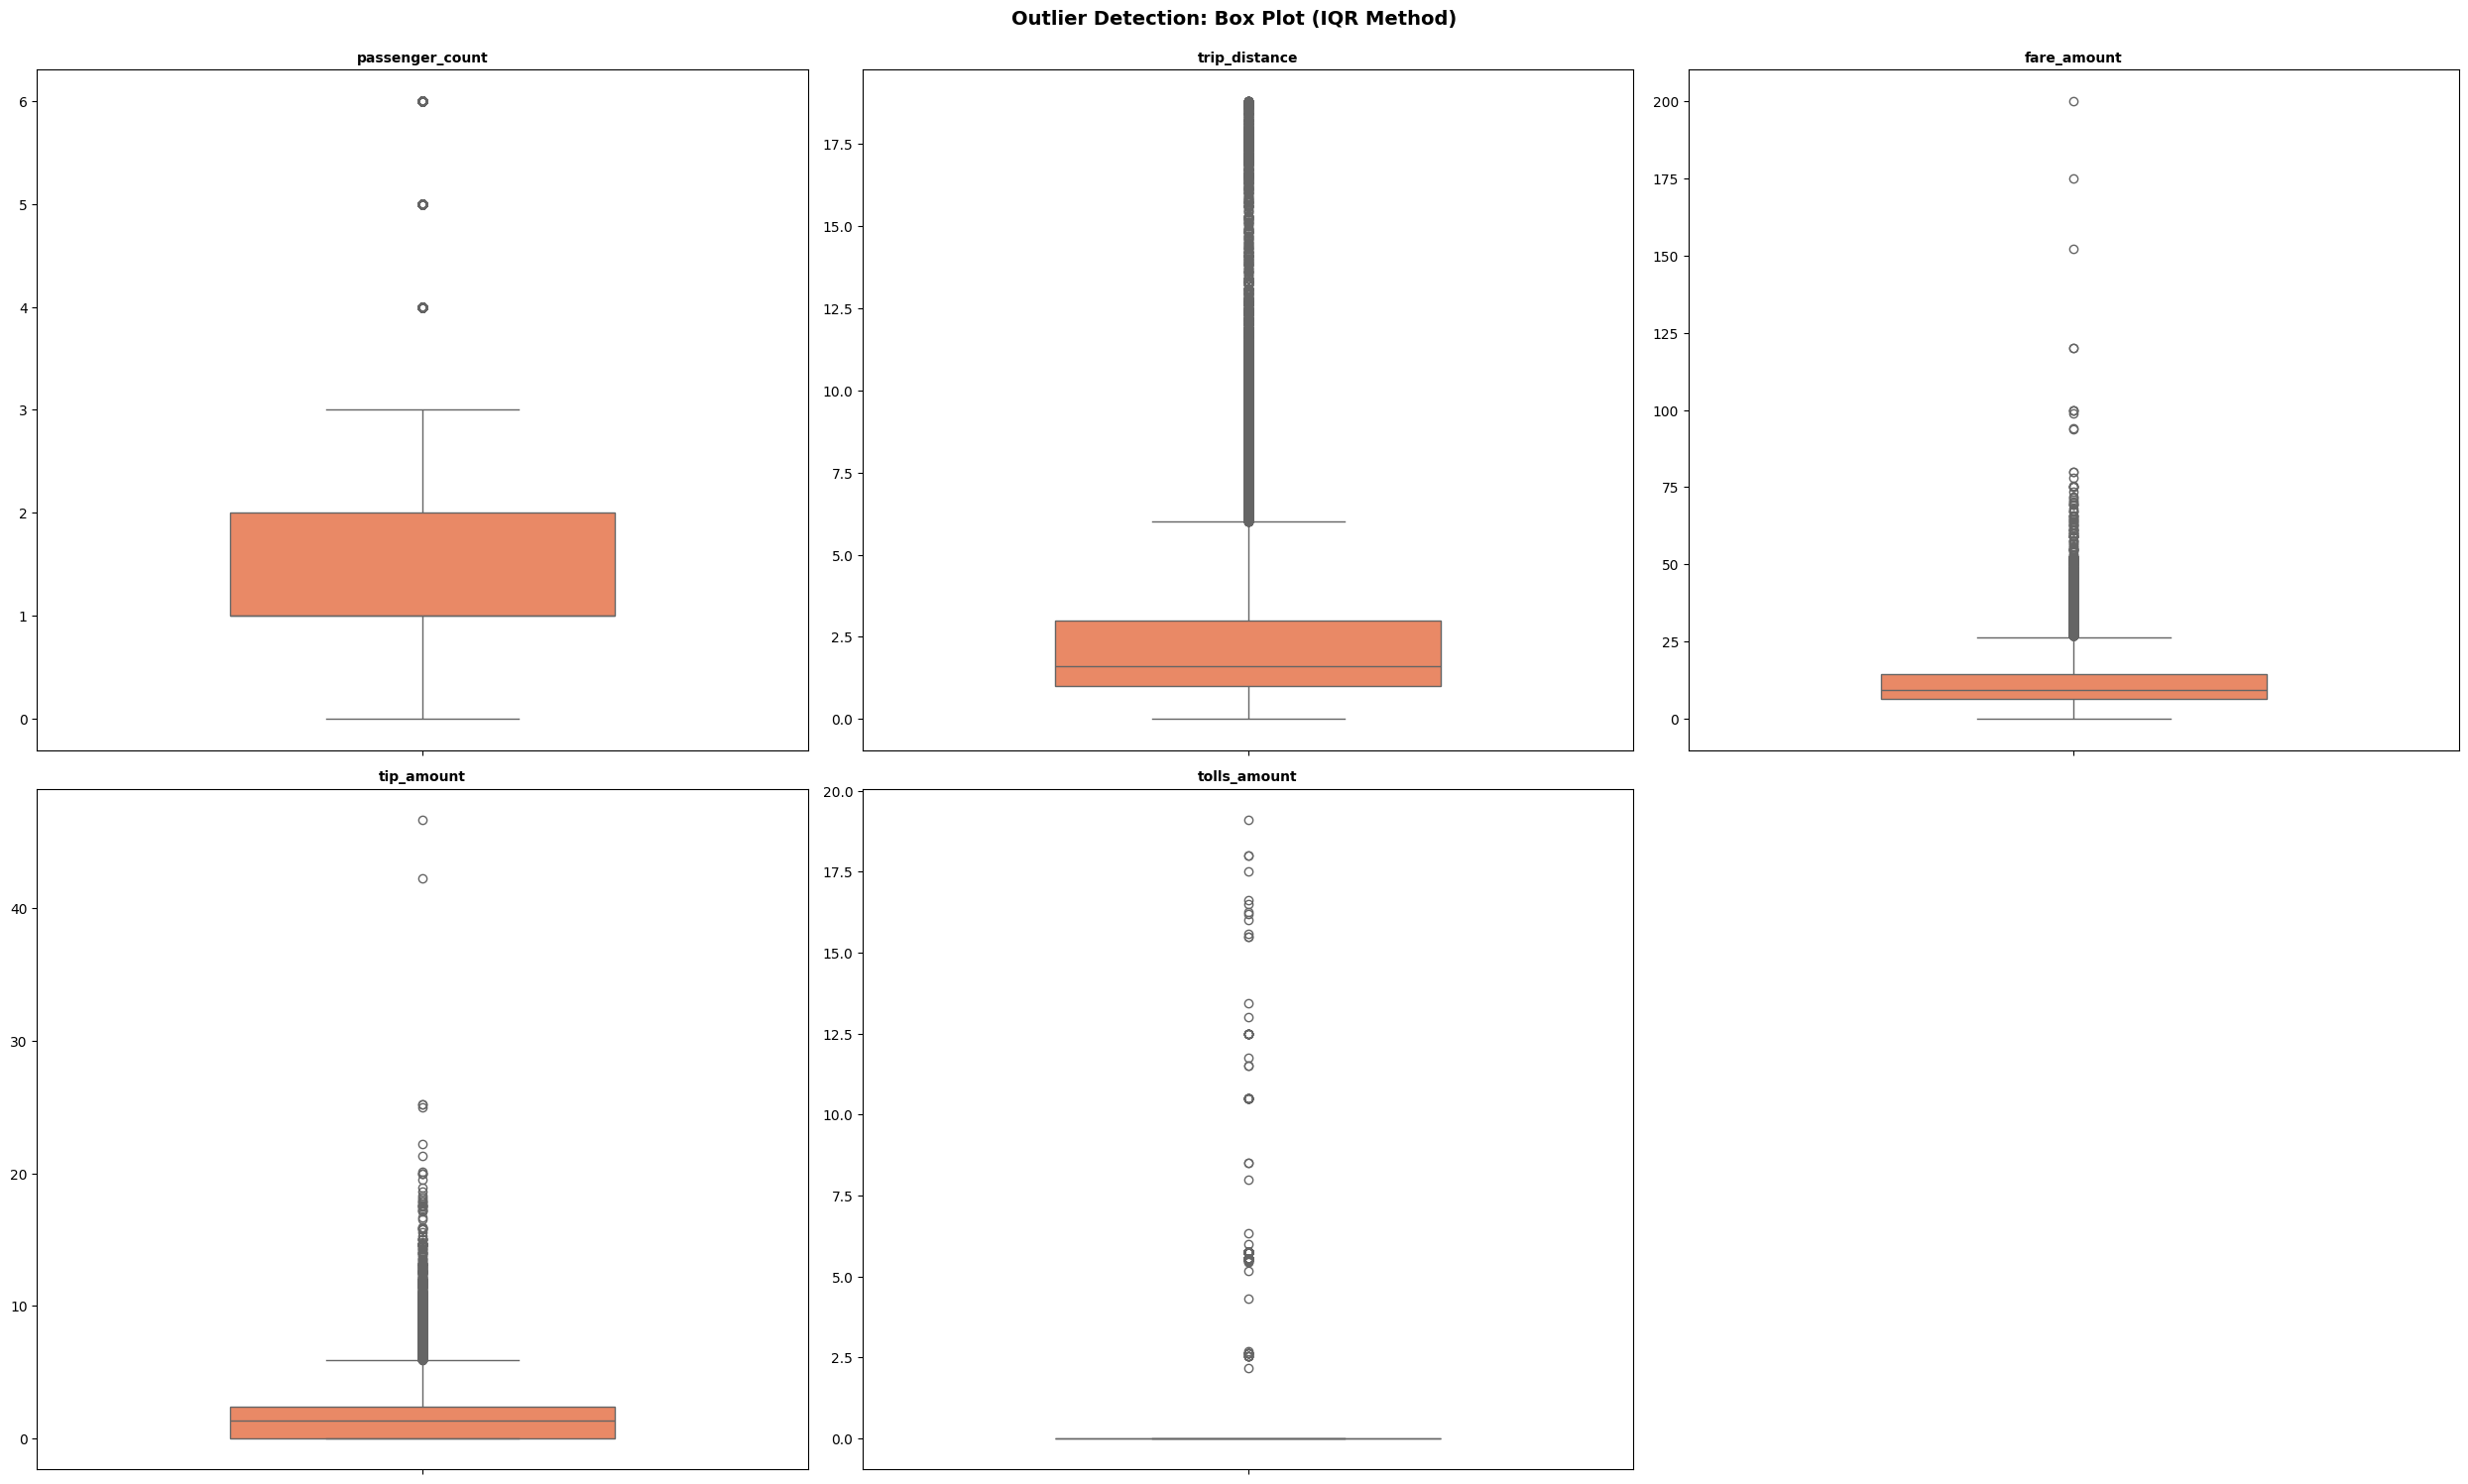

In [119]:
# 박스플롯의 변화

# before
fig, axes = plt.subplots(2, 3, figsize=(25, 15))
axes = axes.ravel()

outlier_summary_before = []

for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.boxplot(y=df_before[col], ax=ax, color='lightgrey', width=0.5)
    ax.set_title(f'{col}', fontsize=10, fontweight='bold')
    ax.set_ylabel('')

    # IQR 기반 이상치 계산
    Q1 = df_before[col].quantile(0.25)
    Q3 = df_before[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_before[(df_before[col] < lower) | (df_before[col] > upper)]
    outlier_count = len(outliers)
    outlier_ratio = outlier_count / len(df_before) * 100

    outlier_summary_before.append({
        'Feature': col,
        'Outlier_Count': outlier_count,
        'Outlier_Ratio(%)': round(outlier_ratio, 2)
    })

# 빈 subplot 제거
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

print('📊Box Plot_Before')
plt.suptitle('Outlier Detection: Box Plot (IQR Method)', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(25, 15))
axes = axes.ravel()

outlier_summary_after = []

for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.boxplot(y=df_after[col], ax=ax, color='coral', width=0.5)
    ax.set_title(f'{col}', fontsize=10, fontweight='bold')
    ax.set_ylabel('')

    # IQR 기반 이상치 계산
    Q1 = df_after[col].quantile(0.25)
    Q3 = df_after[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_after[(df_after[col] < lower) | (df_after[col] > upper)]
    outlier_count = len(outliers)
    outlier_ratio = outlier_count / len(df_after) * 100

    outlier_summary_after.append({
        'Feature': col,
        'Outlier_Count': outlier_count,
        'Outlier_Ratio(%)': round(outlier_ratio, 2)
    })

# 빈 subplot 제거
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

print('📊Box Plot_After')
plt.suptitle('Outlier Detection: Box Plot (IQR Method)', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


In [ ]:
# 평균/표준편차 변화 요약
summary_before = df_before[num_cols].agg(['mean','std']).T
summary_after = df_after[num_cols].agg(['mean','std']).T

summary_compare = summary_before.join(
    summary_after,
    lsuffix='_before',
    rsuffix='_after'
)

summary_compare['mean_change_%'] = (
    (summary_compare['mean_after'] - summary_compare['mean_before'])
    / summary_compare['mean_before'] * 100
)

summary_compare['std_change_%'] = (
    (summary_compare['std_after'] - summary_compare['std_before'])
    / summary_compare['std_before'] * 100
)
display(summary_compare)

,mean_before,std_before,mean_after,std_after,mean_change_%,std_change_%
passenger_count,1.643584,1.304942,1.643665,1.286797,0.004948,-1.390496
trip_distance,2.913400,3.653023,2.742495,3.156372,-5.866182,-13.595626
fare_amount,13.024009,13.240074,12.543755,10.028599,-3.687451,-24.255723
tip_amount,1.835745,2.800537,1.774277,2.289031,-3.348421,-18.264575
tolls_amount,0.312514,1.399153,0.272655,1.295849,-12.754283,-7.383324


**[데이터 클리닝 전후 비교 요약]**  
데이터 클리닝 이후 운행거리와 요금 관련 변수의 극단값이 제거되면서 분포의 꼬리가 완화되었고, 평균 및 표준편차가 안정화되어 일반적인 택시 이용 행태를 보다 잘 대표하는 데이터셋으로 개선되었다. 

---
### **Step 2.** 추가  

1. Credit Card와 Drbit Card 구분없이 'Card'라는 이름으로 정리한다.   
2. 택시 탑승 및 하차시간을 활용할 방법을 고민해본다.  

#### **2-1. 결제수단 자료 정리**

In [131]:
# 결제 수단 정리
df_trip_clean['payment_method_clean'] = df_trip_clean['payment_method'].replace({
    'Credit Card':'Card','Debit Card':'Card','Cash':'Cash'
})
df_trip_clean.head(10)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,pickup_date,dropoff_date,pickup_weekday_num,dropoff_weekday_num,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour,payment_method_clean
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.0,2017-03-25,2017-03-25,5,5,Sat,Sat,8,9,Card
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.0,2017-04-11,2017-04-11,1,1,Tue,Tue,14,15,Card
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.0,2017-12-15,2017-12-15,4,4,Fri,Fri,7,7,Card
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,2017-05-07,2017-05-07,6,6,Sun,Sun,13,13,Cash
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.0,2017-04-15,2017-04-15,5,5,Sat,Sat,23,23,Card
5,Justin Smith,2017-03-25 20:34:11,2017-03-25 20:42:11,Debit Card,6,2.30,9.0,2.06,0.0,2017-03-25,2017-03-25,5,5,Sat,Sat,20,20,Card
6,Tonya Moreno,2017-05-03 19:04:09,2017-05-03 20:03:47,Cash,1,12.83,47.5,9.86,0.0,2017-05-03,2017-05-03,2,2,Wed,Wed,19,20,Cash
7,Hannah Foley,2017-08-15 17:41:06,2017-08-15 18:03:05,Debit Card,1,2.98,16.0,1.78,0.0,2017-08-15,2017-08-15,1,1,Tue,Tue,17,18,Card
8,Katie Whitney,2017-02-04 16:17:07,2017-02-04 16:29:14,Cash,1,1.20,9.0,0.00,0.0,2017-02-04,2017-02-04,5,5,Sat,Sat,16,16,Cash
9,Amanda Jones,2017-11-10 15:20:29,2017-11-10 15:40:55,Cash,1,1.60,13.0,2.75,0.0,2017-11-10,2017-11-10,4,4,Fri,Fri,15,15,Cash
